In [1]:
import pandas as pd 
import numpy as np

## Data Read

In [3]:
data = pd.read_csv('archive/Building_Permits.csv')
data

/var/folders/7c/cxk16l0j7w9gtmjvxds2fc_h0000gn/T/ipykernel_5507/3880517384.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive/Building_Permits.csv')


Permit Number  Permit Type            Permit Type Definition  \
0       201505065519            4                      sign - erect   
1       201604195146            4                      sign - erect   
2       201605278609            3  additions alterations or repairs   
3       201611072166            8            otc alterations permit   
4       201611283529            6                       demolitions   
...              ...          ...                               ...   
198895       M862628            8            otc alterations permit   
198896  201712055595            8            otc alterations permit   
198897       M863507            8            otc alterations permit   
198898       M863747            8            otc alterations permit   
198899       M864287            8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Number Suffix  \
0                05/06/2015  0326   023            140                  NaN   
1                04/19/2016  0306   007            440                  NaN   
2                05/27/2016  0595   203           1647                  NaN   
3                11/07/2016  0156   011           1230                  NaN   
4                11/28/2016  0342   001            950                  NaN   
...                     ...   ...   ...            ...                  ...   
198895           12/05/2017  0113  017A           1228                  NaN   
198896           12/05/2017  0271   014            580                  NaN   
198897           12/06/2017  4318   019           1568                  NaN   
198898           12/06/2017  0298   029            795                  NaN   
198899           12/07/2017  0160   006            838                  NaN   

       Street Name Street Suffix  ...  Existing Construction Type  \
0            Ellis            St  ...                         3.0   
1            Geary            St  ...                         3.0   
2          Pacific            Av  ...                         1.0   
3          Pacific            Av  ...                         5.0   
4           Market            St  ...                         3.0   
...            ...           ...  ...                         ...   
198895  Montgomery            St  ...                         NaN   
198896        Bush            St  ...                         5.0   
198897     Indiana            St  ...                         NaN   
198898      Sutter            St  ...                         NaN   
198899     Pacific            Av  ...                         NaN   

       Existing Construction Type Description Proposed Construction Type  \
0                               constr type 3                        NaN   
1                               constr type 3                        NaN   
2                               constr type 1                        1.0   
3                              wood frame (5)                        5.0   
4                               constr type 3                        NaN   
...                                       ...                        ...   
198895                                    NaN                        NaN   
198896                         wood frame (5)                        5.0   
198897                                    NaN                        NaN   
198898                                    NaN                        NaN   
198899                                    NaN                        NaN   

       Proposed Construction Type Description Site Permit Supervisor District  \
0                                         NaN         NaN                 3.0   
1                                         NaN         NaN                 3.0   
2                               constr type 1         NaN                 3.0   
3                              wood frame (5)         NaN                 3.0   
4                                         NaN         NaN 

In [4]:
data['Record ID']

0         1380611233945
1         1420164406718
2         1424856504716
3         1443574295566
4          144548169992
              ...      
198895    1489337276729
198896    1489462354993
198897    1489539379952
198898    1489608233656
198899    1489796283803
Name: Record ID, Length: 198900, dtype: int64

In [5]:
data['Unit'],data['Unit Suffix']

(0         NaN
 1         0.0
 2         NaN
 3         0.0
 4         NaN
          ... 
 198895    NaN
 198896    NaN
 198897    NaN
 198898    NaN
 198899    NaN
 Name: Unit, Length: 198900, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
          ... 
 198895    NaN
 198896    NaN
 198897    NaN
 198898    NaN
 198899    NaN
 Name: Unit Suffix, Length: 198900, dtype: object)

In [6]:
data.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

## Remove columns with missing values more than 50%

In [8]:
data = data.drop(columns=['Street Number Suffix','Unit Suffix','Unit','Structural Notification',
                         'Voluntary Soft-Story Retrofit','Fire Only Permit','TIDF Compliance',
                         'Site Permit','Completed Date'])
data

Permit Number  Permit Type            Permit Type Definition  \
0       201505065519            4                      sign - erect   
1       201604195146            4                      sign - erect   
2       201605278609            3  additions alterations or repairs   
3       201611072166            8            otc alterations permit   
4       201611283529            6                       demolitions   
...              ...          ...                               ...   
198895       M862628            8            otc alterations permit   
198896  201712055595            8            otc alterations permit   
198897       M863507            8            otc alterations permit   
198898       M863747            8            otc alterations permit   
198899       M864287            8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Name  \
0                05/06/2015  0326   023            140       Ellis   
1                04/19/2016  0306   007            440       Geary   
2                05/27/2016  0595   203           1647     Pacific   
3                11/07/2016  0156   011           1230     Pacific   
4                11/28/2016  0342   001            950      Market   
...                     ...   ...   ...            ...         ...   
198895           12/05/2017  0113  017A           1228  Montgomery   
198896           12/05/2017  0271   014            580        Bush   
198897           12/06/2017  4318   019           1568     Indiana   
198898           12/06/2017  0298   029            795      Sutter   
198899           12/07/2017  0160   006            838     Pacific   

       Street Suffix                                        Description  ...  \
0                 St  ground fl facade: to erect illuminated, electr...  ...   
1                 St            remove (e) awning and associated signs.  ...   
2                 Av                    installation of separating wall  ...   
3                 Av           repair dryrot & stucco at front of bldg.  ...   
4                 St  demolish retail/office/commercial 3-story buil...  ...   
...              ...                                                ...  ...   
198895            St                                       street space  ...   
198896            St                fire alarm upgrade ref 201704123852  ...   
198897            St                                       street space  ...   
198898            St                                street space permit  ...   
198899            Av                                street space permit  ...   

       Plansets Existing Construction Type  \
0           2.0                        3.0   
1           2.0                        3.0   
2           2.0                        1.0   
3           2.0                        5.0   
4           2.0                        3.0   
...         ...                        ...   
198895      NaN                        NaN   
198896      2.0                        5.0   
198897      NaN                        NaN   
198898      NaN                        NaN   
198899      NaN                        NaN   

       Existing Construction Type Description Proposed Construction Type  \
0                               constr type 3                        NaN   
1                               constr type 3                        NaN   
2                               constr type 1                        1.0   
3                              wood frame (5)                        5.0   
4                               constr type 3                        NaN   
...                                       ...                        ...   
198895                                    NaN                        NaN   
198896                         wood frame (5)                        5.0   
198897                                    NaN                        NaN   
198898                                 

In [9]:
data.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                              2768
Description                                 290
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [10]:
filled_data=data.bfill()

In [11]:
len(filled_data['Location'].unique())

57605

In [12]:
filled_data['Existing Use'].unique()

array(['tourist hotel/motel', 'retail sales', '1 family dwelling',
       'apartments', '2 family dwelling', 'church', 'storage shed',
       'office', 'vacant lot', 'food/beverage hndlng',
       'residential hotel', 'filling/service stn', 'workshop commercial',
       'clinics-medic/dental', 'misc group residns.', 'hospital', 'club',
       'barber/beauty salon', 'warehouse,no frnitur', 'school',
       'artist live/work', 'manufacturing', 'garment shops',
       'public assmbly other', 'auto repairs', 'lending institution',
       'museum', 'warehouse, furniture', 'prkng garage/private',
       'antenna', 'health studios & gym', 'massage parlor',
       'printing plant', 'parking lot', 'workshop residential',
       'power plant', 'tower', 'mortuary', 'animal sale or care',
       'laundry/laundromat', 'nite club', 'paint store',
       'recreation bldg', 'theater', 'prkng garage/public', 'sign',
       'phone xchnge/equip', 'dance hall', 'sfpd or sffd station',
       'storage tank

In [13]:
data['Location']

0         (37.785719256680785, -122.40852313194863)
1          (37.78733980600732, -122.41063199757738)
2           (37.7946573324287, -122.42232562979227)
3          (37.79595867909168, -122.41557405519474)
4          (37.78315261897309, -122.40950883997789)
                            ...                    
198895                                          NaN
198896                                          NaN
198897                                          NaN
198898                                          NaN
198899                                          NaN
Name: Location, Length: 198900, dtype: object

In [14]:
data.describe()

Permit Type  Street Number  Number of Existing Stories  \
count  198900.000000  198900.000000               156116.000000   
mean        7.522323    1121.728944                    5.705773   
std         1.457451    1135.768948                    8.613455   
min         1.000000       0.000000                    0.000000   
25%         8.000000     235.000000                    2.000000   
50%         8.000000     710.000000                    3.000000   
75%         8.000000    1700.000000                    4.000000   
max         8.000000    8400.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.584903e+06   
min                      0.000000    1.000000e+00  0.000000e+00   
25%                      2.000000    3.300000e+03  1.000000e+00   
50%                      3.000000    1.100000e+04  7.000000e+03   
75%                      4.000000    3.500000e+04  2.870750e+04   
max                     78.000000    5.379586e+08  7.805000e+08   

       Existing Units  Proposed Units       Plansets  \
count   147362.000000   147989.000000  161591.000000   
mean        15.666164       16.510950       1.274650   
std         74.476321       75.220444      22.407345   
min          0.000000        0.000000       0.000000   
25%          1.000000        1.000000       0.000000   
50%          1.000000        2.000000       2.000000   
75%          4.000000        4.000000       2.000000   
max       1907.000000     1911.000000    9000.000000   

       Existing Construction Type  Proposed Construction Type  \
count               155534.000000               155738.000000   
mean                     4.072878                    4.089529   
std                      1.585756                    1.578766   
min                      1.000000                    1.000000   
25%                      3.000000                    3.000000   
50%                      5.000000                    5.000000   
75%                      5.000000                    5.000000   
max                      5.000000                    5.000000   

       Supervisor District        Zipcode     Record ID  
count        197183.000000  197184.000000  1.989000e+05  
mean              5.538403   94115.500558  1.162048e+12  
std               2.887041       9.270131  4.918215e+11  
min               1.000000   94102.000000  1.293532e+10  
25%               3.000000   94109.000000  1.308567e+12  
50%               6.000000   94114.000000  1.371840e+12  
75%               8.000000   94122.000000  1.435000e+12  
max              11.000000   94158.000000  1.498342e+12

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Name                             198900 non-null  object 
 8   Street Suffix                           196132 non-null  object 
 9   Description                             198610 non-null  object 
 10  Current Status                          1989

In [16]:
filled_data = data.fillna(method='bfill',axis=0)
filled_data

/var/folders/7c/cxk16l0j7w9gtmjvxds2fc_h0000gn/T/ipykernel_5507/2710259925.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='bfill',axis=0)


Permit Number  Permit Type            Permit Type Definition  \
0       201505065519            4                      sign - erect   
1       201604195146            4                      sign - erect   
2       201605278609            3  additions alterations or repairs   
3       201611072166            8            otc alterations permit   
4       201611283529            6                       demolitions   
...              ...          ...                               ...   
198895       M862628            8            otc alterations permit   
198896  201712055595            8            otc alterations permit   
198897       M863507            8            otc alterations permit   
198898       M863747            8            otc alterations permit   
198899       M864287            8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Name  \
0                05/06/2015  0326   023            140       Ellis   
1                04/19/2016  0306   007            440       Geary   
2                05/27/2016  0595   203           1647     Pacific   
3                11/07/2016  0156   011           1230     Pacific   
4                11/28/2016  0342   001            950      Market   
...                     ...   ...   ...            ...         ...   
198895           12/05/2017  0113  017A           1228  Montgomery   
198896           12/05/2017  0271   014            580        Bush   
198897           12/06/2017  4318   019           1568     Indiana   
198898           12/06/2017  0298   029            795      Sutter   
198899           12/07/2017  0160   006            838     Pacific   

       Street Suffix                                        Description  ...  \
0                 St  ground fl facade: to erect illuminated, electr...  ...   
1                 St            remove (e) awning and associated signs.  ...   
2                 Av                    installation of separating wall  ...   
3                 Av           repair dryrot & stucco at front of bldg.  ...   
4                 St  demolish retail/office/commercial 3-story buil...  ...   
...              ...                                                ...  ...   
198895            St                                       street space  ...   
198896            St                fire alarm upgrade ref 201704123852  ...   
198897            St                                       street space  ...   
198898            St                                street space permit  ...   
198899            Av                                street space permit  ...   

       Plansets Existing Construction Type  \
0           2.0                        3.0   
1           2.0                        3.0   
2           2.0                        1.0   
3           2.0                        5.0   
4           2.0                        3.0   
...         ...                        ...   
198895      2.0                        5.0   
198896      2.0                        5.0   
198897      NaN                        NaN   
198898      NaN                        NaN   
198899      NaN                        NaN   

       Existing Construction Type Description Proposed Construction Type  \
0                               constr type 3                        1.0   
1                               constr type 3                        1.0   
2                               constr type 1                        1.0   
3                              wood frame (5)                        5.0   
4                               constr type 3                        1.0   
...                                       ...                        ...   
198895                         wood frame (5)                        5.0   
198896                         wood frame (5)                        5.0   
198897                                    NaN                        NaN   
198898                                 

In [17]:
filled_data.isnull().sum()

Permit Number                              0
Permit Type                                0
Permit Type Definition                     0
Permit Creation Date                       0
Block                                      0
Lot                                        0
Street Number                              0
Street Name                                0
Street Suffix                              0
Description                                0
Current Status                             0
Current Status Date                        0
Filed Date                                 0
Issued Date                                0
First Construction Document Date           0
Number of Existing Stories                 3
Number of Proposed Stories                 3
Permit Expiration Date                     3
Estimated Cost                             3
Revised Cost                               0
Existing Use                               3
Existing Units                             3
Proposed U

## Remove columns with string data (Can't be categorized)

In [19]:
clean_data = filled_data.drop(columns=['Description','Street Suffix','Existing Construction Type Description',
                                             'Proposed Construction Type Description'])

In [20]:
#clean_data['Record ID']
clean_data

Permit Number  Permit Type            Permit Type Definition  \
0       201505065519            4                      sign - erect   
1       201604195146            4                      sign - erect   
2       201605278609            3  additions alterations or repairs   
3       201611072166            8            otc alterations permit   
4       201611283529            6                       demolitions   
...              ...          ...                               ...   
198895       M862628            8            otc alterations permit   
198896  201712055595            8            otc alterations permit   
198897       M863507            8            otc alterations permit   
198898       M863747            8            otc alterations permit   
198899       M864287            8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Name  \
0                05/06/2015  0326   023            140       Ellis   
1                04/19/2016  0306   007            440       Geary   
2                05/27/2016  0595   203           1647     Pacific   
3                11/07/2016  0156   011           1230     Pacific   
4                11/28/2016  0342   001            950      Market   
...                     ...   ...   ...            ...         ...   
198895           12/05/2017  0113  017A           1228  Montgomery   
198896           12/05/2017  0271   014            580        Bush   
198897           12/06/2017  4318   019           1568     Indiana   
198898           12/06/2017  0298   029            795      Sutter   
198899           12/07/2017  0160   006            838     Pacific   

       Current Status Current Status Date  ...       Proposed Use  \
0             expired          12/21/2017  ...       retail sales   
1              issued          08/03/2017  ...       retail sales   
2           withdrawn          09/26/2017  ...       retail sales   
3            complete          07/24/2017  ...  1 family dwelling   
4              issued          12/01/2017  ...         apartments   
...               ...                 ...  ...                ...   
198895         issued          12/05/2017  ...         apartments   
198896         issued          12/06/2017  ...         apartments   
198897         issued          12/06/2017  ...                NaN   
198898         issued          12/06/2017  ...                NaN   
198899         issued          12/07/2017  ...                NaN   

       Proposed Units Plansets  Existing Construction Type  \
0                39.0      2.0                         3.0   
1                39.0      2.0                         3.0   
2                39.0      2.0                         1.0   
3                 1.0      2.0                         5.0   
4               326.0      2.0                         3.0   
...               ...      ...                         ...   
198895            4.0      2.0                         5.0   
198896            4.0      2.0                         5.0   
198897            NaN      NaN                         NaN   
198898            NaN      NaN                         NaN   
198899            NaN      NaN                         NaN   

        Proposed Construction Type Supervisor District  \
0                              1.0                 3.0   
1                              1.0                 3.0   
2                              1.0                 3.0   
3                              5.0                 3.0   
4                              1.0                 6.0   
...                            ...                 ...   
198895                         5.0                 NaN   
198896                         5.0                 NaN   
198897                         NaN                 NaN   
198898                         NaN                 NaN   
198899                         NaN                 NaN   

        Neighborhoods - Analysis Boundarie

In [21]:
clean_data.dropna(inplace=True)

In [22]:
clean_data

Permit Number  Permit Type            Permit Type Definition  \
0       201505065519            4                      sign - erect   
1       201604195146            4                      sign - erect   
2       201605278609            3  additions alterations or repairs   
3       201611072166            8            otc alterations permit   
4       201611283529            6                       demolitions   
...              ...          ...                               ...   
198881       M893407            8            otc alterations permit   
198882  201802232172            8            otc alterations permit   
198883       M893427            8            otc alterations permit   
198884       M893447            8            otc alterations permit   
198885  201802232173            8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Name  \
0                05/06/2015  0326   023            140       Ellis   
1                04/19/2016  0306   007            440       Geary   
2                05/27/2016  0595   203           1647     Pacific   
3                11/07/2016  0156   011           1230     Pacific   
4                11/28/2016  0342   001            950      Market   
...                     ...   ...   ...            ...         ...   
198881           02/23/2018  0018   004           2300    Stockton   
198882           02/23/2018  6021  001B            730   Excelsior   
198883           02/23/2018  0315   021            377       Geary   
198884           02/23/2018  3504   030           1699      Market   
198885           02/23/2018  2150  001A           2007        30th   

       Current Status Current Status Date  ...       Proposed Use  \
0             expired          12/21/2017  ...       retail sales   
1              issued          08/03/2017  ...       retail sales   
2           withdrawn          09/26/2017  ...       retail sales   
3            complete          07/24/2017  ...  1 family dwelling   
4              issued          12/01/2017  ...         apartments   
...               ...                 ...  ...                ...   
198881         issued          02/23/2018  ...  1 family dwelling   
198882         issued          02/23/2018  ...  1 family dwelling   
198883         issued          02/23/2018  ...  1 family dwelling   
198884          filed          02/23/2018  ...  1 family dwelling   
198885          filed          02/23/2018  ...  1 family dwelling   

       Proposed Units Plansets  Existing Construction Type  \
0                39.0      2.0                         3.0   
1                39.0      2.0                         3.0   
2                39.0      2.0                         1.0   
3                 1.0      2.0                         5.0   
4               326.0      2.0                         3.0   
...               ...      ...                         ...   
198881            1.0      0.0                         5.0   
198882            1.0      0.0                         5.0   
198883            1.0      2.0                         5.0   
198884            1.0      2.0                         5.0   
198885            1.0      2.0                         5.0   

        Proposed Construction Type Supervisor District  \
0                              1.0                 3.0   
1                              1.0                 3.0   
2                              1.0                 3.0   
3                              5.0                 3.0   
4                              1.0                 6.0   
...                            ...                 ...   
198881                         5.0                 3.0   
198882                         5.0                11.0   
198883                         5.0                 3.0   
198884                         5.0                 6.0   
198885                         5.0                 4.0   

        Neighborhoods - Analysis Boundarie

## CHECKING FOR DUPLICATES IN DATA

In [24]:
print(clean_data.duplicated())
print(clean_data.duplicated().sum())
clean_data = clean_data.drop_duplicates()

0         False
1         False
2         False
3         False
4         False
          ...  
198881    False
198882    False
198883    False
198884    False
198885    False
Length: 198886, dtype: bool
0


In [25]:
clean_data['Permit Type']=clean_data['Permit Type'].astype(str)

In [26]:
clean_data

Permit Number Permit Type            Permit Type Definition  \
0       201505065519           4                      sign - erect   
1       201604195146           4                      sign - erect   
2       201605278609           3  additions alterations or repairs   
3       201611072166           8            otc alterations permit   
4       201611283529           6                       demolitions   
...              ...         ...                               ...   
198881       M893407           8            otc alterations permit   
198882  201802232172           8            otc alterations permit   
198883       M893427           8            otc alterations permit   
198884       M893447           8            otc alterations permit   
198885  201802232173           8            otc alterations permit   

       Permit Creation Date Block   Lot  Street Number Street Name  \
0                05/06/2015  0326   023            140       Ellis   
1                04/19/2016  0306   007            440       Geary   
2                05/27/2016  0595   203           1647     Pacific   
3                11/07/2016  0156   011           1230     Pacific   
4                11/28/2016  0342   001            950      Market   
...                     ...   ...   ...            ...         ...   
198881           02/23/2018  0018   004           2300    Stockton   
198882           02/23/2018  6021  001B            730   Excelsior   
198883           02/23/2018  0315   021            377       Geary   
198884           02/23/2018  3504   030           1699      Market   
198885           02/23/2018  2150  001A           2007        30th   

       Current Status Current Status Date  ...       Proposed Use  \
0             expired          12/21/2017  ...       retail sales   
1              issued          08/03/2017  ...       retail sales   
2           withdrawn          09/26/2017  ...       retail sales   
3            complete          07/24/2017  ...  1 family dwelling   
4              issued          12/01/2017  ...         apartments   
...               ...                 ...  ...                ...   
198881         issued          02/23/2018  ...  1 family dwelling   
198882         issued          02/23/2018  ...  1 family dwelling   
198883         issued          02/23/2018  ...  1 family dwelling   
198884          filed          02/23/2018  ...  1 family dwelling   
198885          filed          02/23/2018  ...  1 family dwelling   

       Proposed Units Plansets  Existing Construction Type  \
0                39.0      2.0                         3.0   
1                39.0      2.0                         3.0   
2                39.0      2.0                         1.0   
3                 1.0      2.0                         5.0   
4               326.0      2.0                         3.0   
...               ...      ...                         ...   
198881            1.0      0.0                         5.0   
198882            1.0      0.0                         5.0   
198883            1.0      2.0                         5.0   
198884            1.0      2.0                         5.0   
198885            1.0      2.0                         5.0   

        Proposed Construction Type Supervisor District  \
0                              1.0                 3.0   
1                              1.0                 3.0   
2                              1.0                 3.0   
3                              5.0                 3.0   
4                              1.0                 6.0   
...                            ...                 ...   
198881                         5.0                 3.0   
198882                         5.0                11.0   
198883                         5.0                 3.0   
198884                         5.0                 6.0   
198885                         5.0                 4.0   

        Neighborhoods - Analysis Boundaries  Zipcode  

In [27]:
numeric_cols = clean_data.select_dtypes(include=['number'])

## Detecting Outliers

### 1) Using Z_Score Test

	Z-score Method:
	A value is considered an outlier if its Z-score > 3 (3 standard deviations from the mean).

In [31]:
z_scores = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std()).abs()
outliers_z = z_scores > 3
print(outliers_z)
print(outliers_z.sum().sum()) ## count of abs(Z-Score)>3 entries in the data

        Street Number  Number of Existing Stories  Number of Proposed Stories  \
0               False                       False                       False   
1               False                       False                       False   
2               False                       False                       False   
3               False                       False                       False   
4               False                       False                       False   
...               ...                         ...                         ...   
198881          False                       False                       False   
198882          False                       False                       False   
198883          False                       False                       False   
198884          False                       False                       False   
198885          False                       False                       False   

        Estimated Cost  Rev

### Using Interquartile Range 

		IQR Method:
	•	Lower Bound: Q1 - 1.5 * IQR
	•	Upper Bound: Q3 + 1.5 * IQR
	•	Any value outside this range is considered an outlier.

In [34]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
print(outliers_iqr)
print(outliers_iqr.sum().sum())
#print(lower_bound)
#print(upper_bound)

        Street Number  Number of Existing Stories  Number of Proposed Stories  \
0               False                       False                       False   
1               False                       False                       False   
2               False                       False                       False   
3               False                       False                       False   
4               False                       False                       False   
...               ...                         ...                         ...   
198881          False                       False                       False   
198882          False                       False                       False   
198883          False                       False                       False   
198884          False                       False                       False   
198885          False                       False                       False   

        Estimated Cost  Rev

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

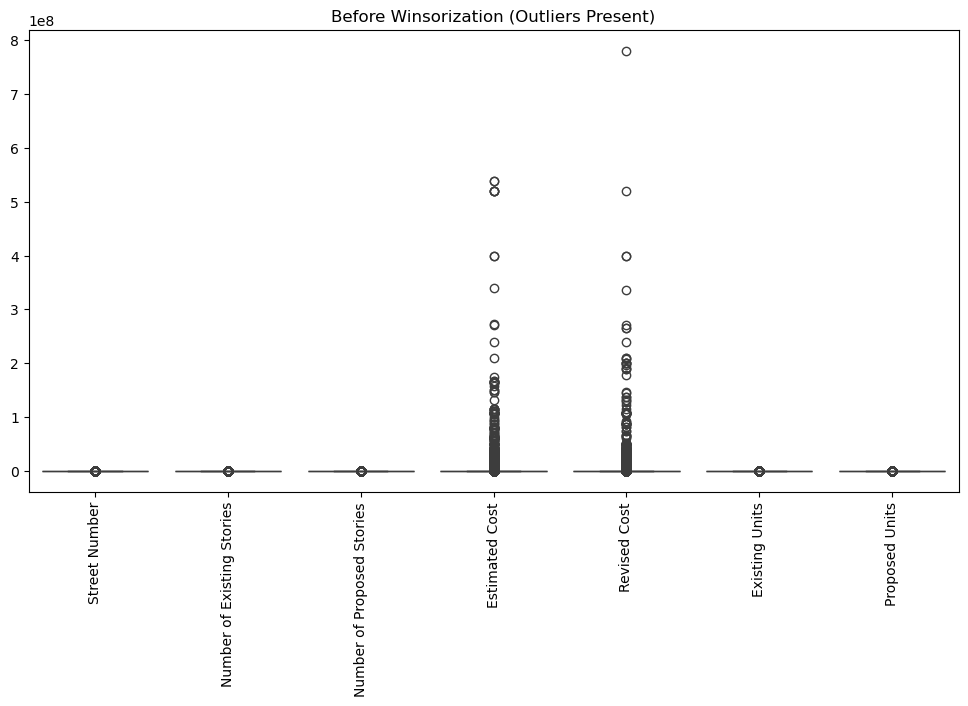

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols[[
    'Street Number', 
    'Number of Existing Stories', 
    'Number of Proposed Stories', 
    'Estimated Cost', 
    'Revised Cost', 
    'Existing Units', 
    'Proposed Units'
]])
plt.title("Before Winsorization (Outliers Present)")
plt.xticks(rotation=90)
plt.show()

## Treating Outliers

#### if the number of outliers is less than 10% of the dataset, we simply drop them. Otherwise, we replace them using winsorization.

In [39]:
from scipy.stats.mstats import winsorize

In [40]:
no_of_outliers = outliers_iqr.sum().sum()  
if no_of_outliers <= 0.1 * len(clean_data):  
    clean_data = clean_data[~outliers_iqr.any(axis=1)]  
    print("Outliers dropped")
else:
     for col in numeric_cols.columns:  
         Q1 = clean_data[col].quantile(0.25)
         Q3 = clean_data[col].quantile(0.75)
         IQR = Q3 - Q1
         lower_bound = Q1 - 1.5 * IQR
         upper_bound = Q3 + 1.5 * IQR
         clean_data[col] = clean_data[col].clip(lower=lower_bound, upper=upper_bound)  # Winsorization
     print("Outliersreplaced")

Outliersreplaced


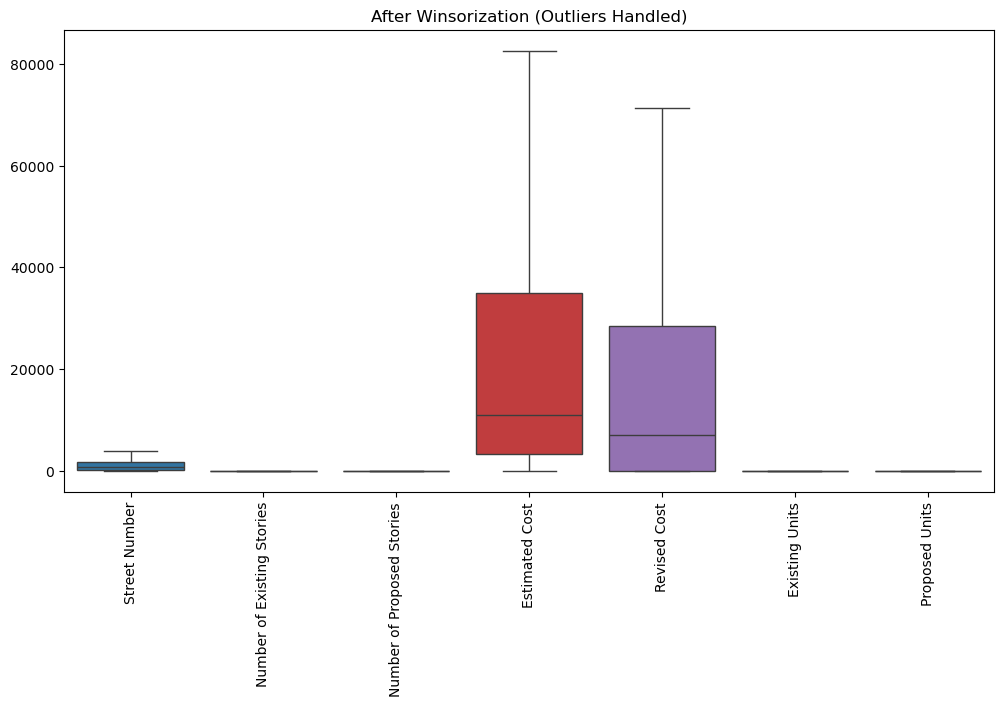

In [41]:
# Define the specific columns to Winsorize
selected_cols = [
    'Street Number', 
    'Number of Existing Stories', 
    'Number of Proposed Stories', 
    'Estimated Cost', 
    'Revised Cost', 
    'Existing Units', 
    'Proposed Units'
]
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data[selected_cols])
plt.title("After Winsorization (Outliers Handled)")
plt.xticks(rotation=90)
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis (Single Variable)

In [44]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198886 entries, 0 to 198885
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Number                        198886 non-null  object 
 1   Permit Type                          198886 non-null  object 
 2   Permit Type Definition               198886 non-null  object 
 3   Permit Creation Date                 198886 non-null  object 
 4   Block                                198886 non-null  object 
 5   Lot                                  198886 non-null  object 
 6   Street Number                        198886 non-null  float64
 7   Street Name                          198886 non-null  object 
 8   Current Status                       198886 non-null  object 
 9   Current Status Date                  198886 non-null  object 
 10  Filed Date                           198886 non-null  object 
 11  Issued Date       

In [45]:
clean_data.describe()

Street Number  Number of Existing Stories  Number of Proposed Stories  \
count  198886.000000               198886.000000               198886.000000   
mean     1100.784075                    3.394037                    3.437454   
std      1067.661164                    1.843102                    1.825175   
min         0.000000                    0.000000                    0.000000   
25%       235.000000                    2.000000                    2.000000   
50%       710.000000                    3.000000                    3.000000   
75%      1700.000000                    4.000000                    4.000000   
max      3897.500000                    7.000000                    7.000000   

       Estimated Cost   Revised Cost  Existing Units  Proposed Units  \
count   198886.000000  198886.000000   198886.000000   198886.000000   
mean     24382.769602   19109.326854        2.766596        2.868867   
std      28219.880787   24988.993885        2.995127        3.019657   
min          1.000000       0.000000        0.000000        0.000000   
25%       3300.000000       1.000000        1.000000        1.000000   
50%      11000.000000    7000.000000        1.000000        1.000000   
75%      35000.000000   28500.000000        4.000000        4.000000   
max      82550.000000   71248.500000        8.500000        8.500000   

            Plansets  Existing Construction Type  Proposed Construction Type  \
count  198886.000000               198886.000000               198886.000000   
mean        1.217617                    4.072524                    4.086190   
std         0.978421                    1.585580                    1.580706   
min         0.000000                    1.000000                    1.000000   
25%         0.000000                    3.000000                    3.000000   
50%         2.000000                    5.000000                    5.000000   
75%         2.000000                    5.000000                    5.000000   
max         5.000000                    5.000000                    5.000000   

       Supervisor District        Zipcode     Record ID  
count        198886.000000  198886.000000  1.988860e+05  
mean              5.539098   94115.406461  1.344068e+12  
std               2.886816       8.934422  1.201447e+11  
min               1.000000   94102.000000  1.118925e+12  
25%               3.000000   94109.000000  1.308564e+12  
50%               6.000000   94114.000000  1.371834e+12  
75%               8.000000   94122.000000  1.434991e+12  
max              11.000000   94141.500000  1.498342e+12

In [46]:
numeric_data = clean_data.select_dtypes(include=['number'])
numeric_data = numeric_data.drop(['Record ID'], axis=1)
print(numeric_data.skew())
print(numeric_data.kurt())

Street Number                 1.084205
Number of Existing Stories    0.982318
Number of Proposed Stories    0.972518
Estimated Cost                1.160149
Revised Cost                  1.220862
Existing Units                1.052315
Proposed Units                0.999947
Plansets                     -0.434647
Existing Construction Type   -1.244299
Proposed Construction Type   -1.268906
Supervisor District           0.101309
Zipcode                       0.536564
dtype: float64
Street Number                 0.221073
Number of Existing Stories   -0.254398
Number of Proposed Stories   -0.280862
Estimated Cost               -0.129216
Revised Cost                 -0.027670
Existing Units               -0.439169
Proposed Units               -0.560300
Plansets                     -1.788134
Existing Construction Type   -0.282761
Proposed Construction Type   -0.224664
Supervisor District          -1.162779
Zipcode                      -0.443706
dtype: float64


In [47]:
print(numeric_data.var())

Street Number                 1.139900e+06
Number of Existing Stories    3.397027e+00
Number of Proposed Stories    3.331263e+00
Estimated Cost                7.963617e+08
Revised Cost                  6.244498e+08
Existing Units                8.970787e+00
Proposed Units                9.118326e+00
Plansets                      9.573086e-01
Existing Construction Type    2.514065e+00
Proposed Construction Type    2.498633e+00
Supervisor District           8.333708e+00
Zipcode                       7.982389e+01
dtype: float64


In [48]:
print(numeric_data.median())

Street Number                   710.0
Number of Existing Stories        3.0
Number of Proposed Stories        3.0
Estimated Cost                11000.0
Revised Cost                   7000.0
Existing Units                    1.0
Proposed Units                    1.0
Plansets                          2.0
Existing Construction Type        5.0
Proposed Construction Type        5.0
Supervisor District               6.0
Zipcode                       94114.0
dtype: float64


In [49]:
print(numeric_data.mode())

   Street Number  Number of Existing Stories  Number of Proposed Stories  \
0         3897.5                         2.0                         2.0   

   Estimated Cost  Revised Cost  Existing Units  Proposed Units  Plansets  \
0         82550.0           1.0             1.0             1.0       2.0   

   Existing Construction Type  Proposed Construction Type  \
0                         5.0                         5.0   

   Supervisor District  Zipcode  
0                  3.0  94110.0  


### Frequenct Distrubution

In [51]:
categorical_data = clean_data.select_dtypes(include=['object', 'category'])
frequency_distribution = categorical_data.apply(lambda x: x.value_counts())
print(frequency_distribution)

                                          Permit Number  Permit Type  \
(37.70816952820484, -122.4495824817392)             NaN          NaN   
(37.70817427088525, -122.46354383455132)            NaN          NaN   
(37.7082011113186, -122.46030421092122)             NaN          NaN   
(37.70820204855604, -122.45808060383742)            NaN          NaN   
(37.708204600085985, -122.4630562449027)            NaN          NaN   
...                                                 ...          ...   
warehouse,no frnitur                                NaN          NaN   
wholesale sales                                     NaN          NaN   
withdrawn                                           NaN          NaN   
workshop commercial                                 NaN          NaN   
workshop residential                                NaN          NaN   

                                          Permit Type Definition  \
(37.70816952820484, -122.4495824817392)                      NaN   

### Histogam_Plot

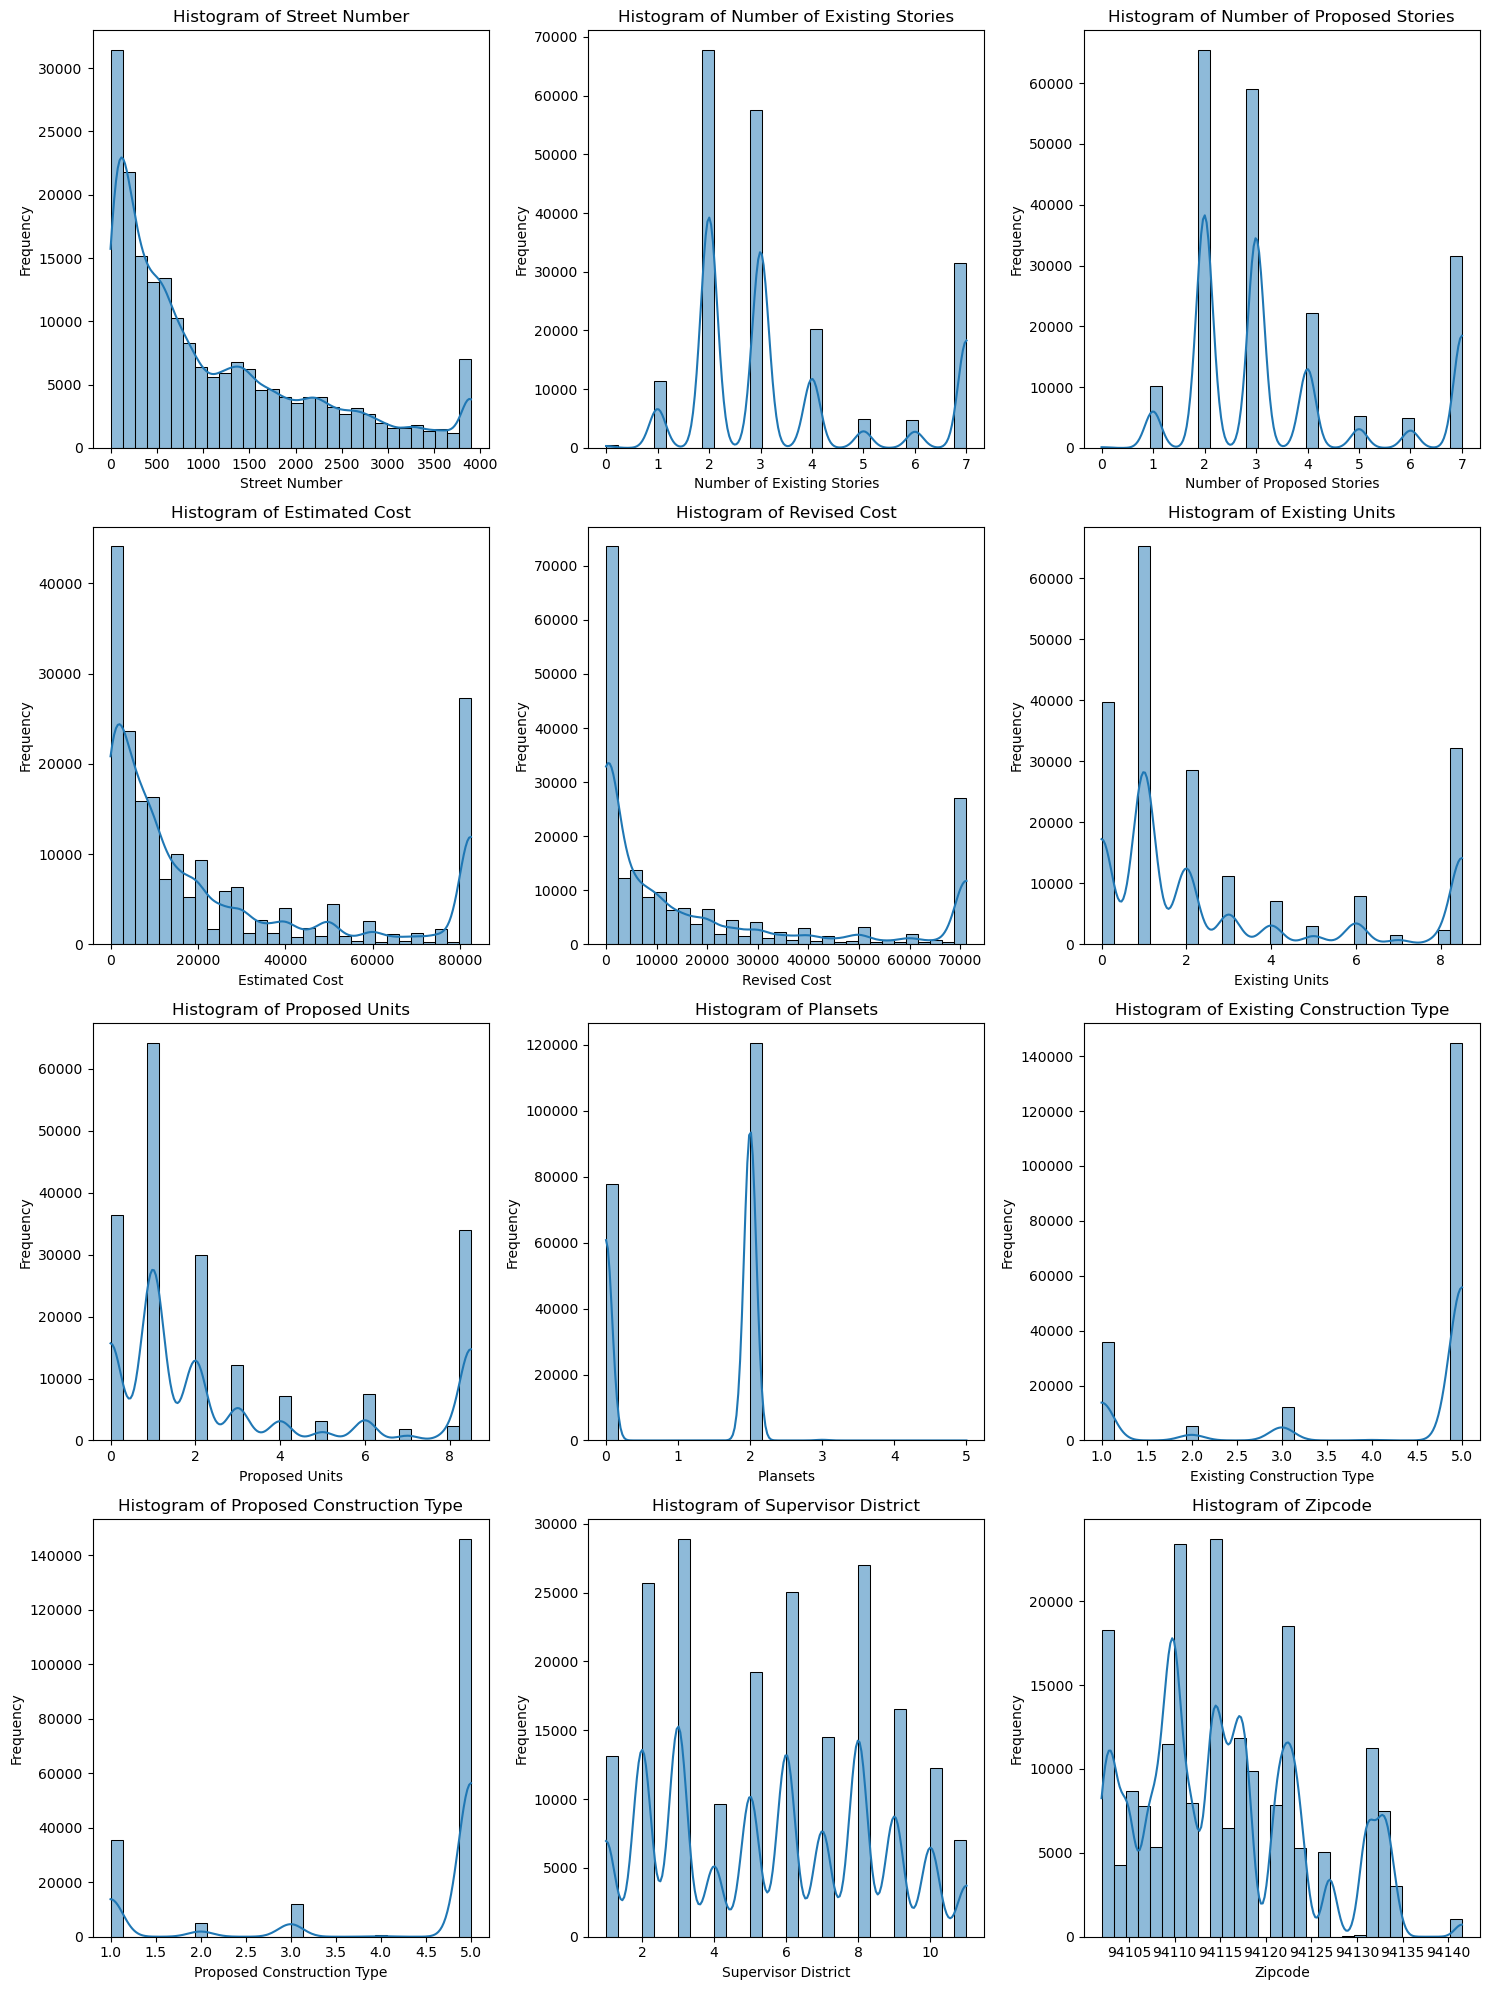

In [53]:
num_columns = len(numeric_data.columns)
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(numeric_data[column].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Box_Plot

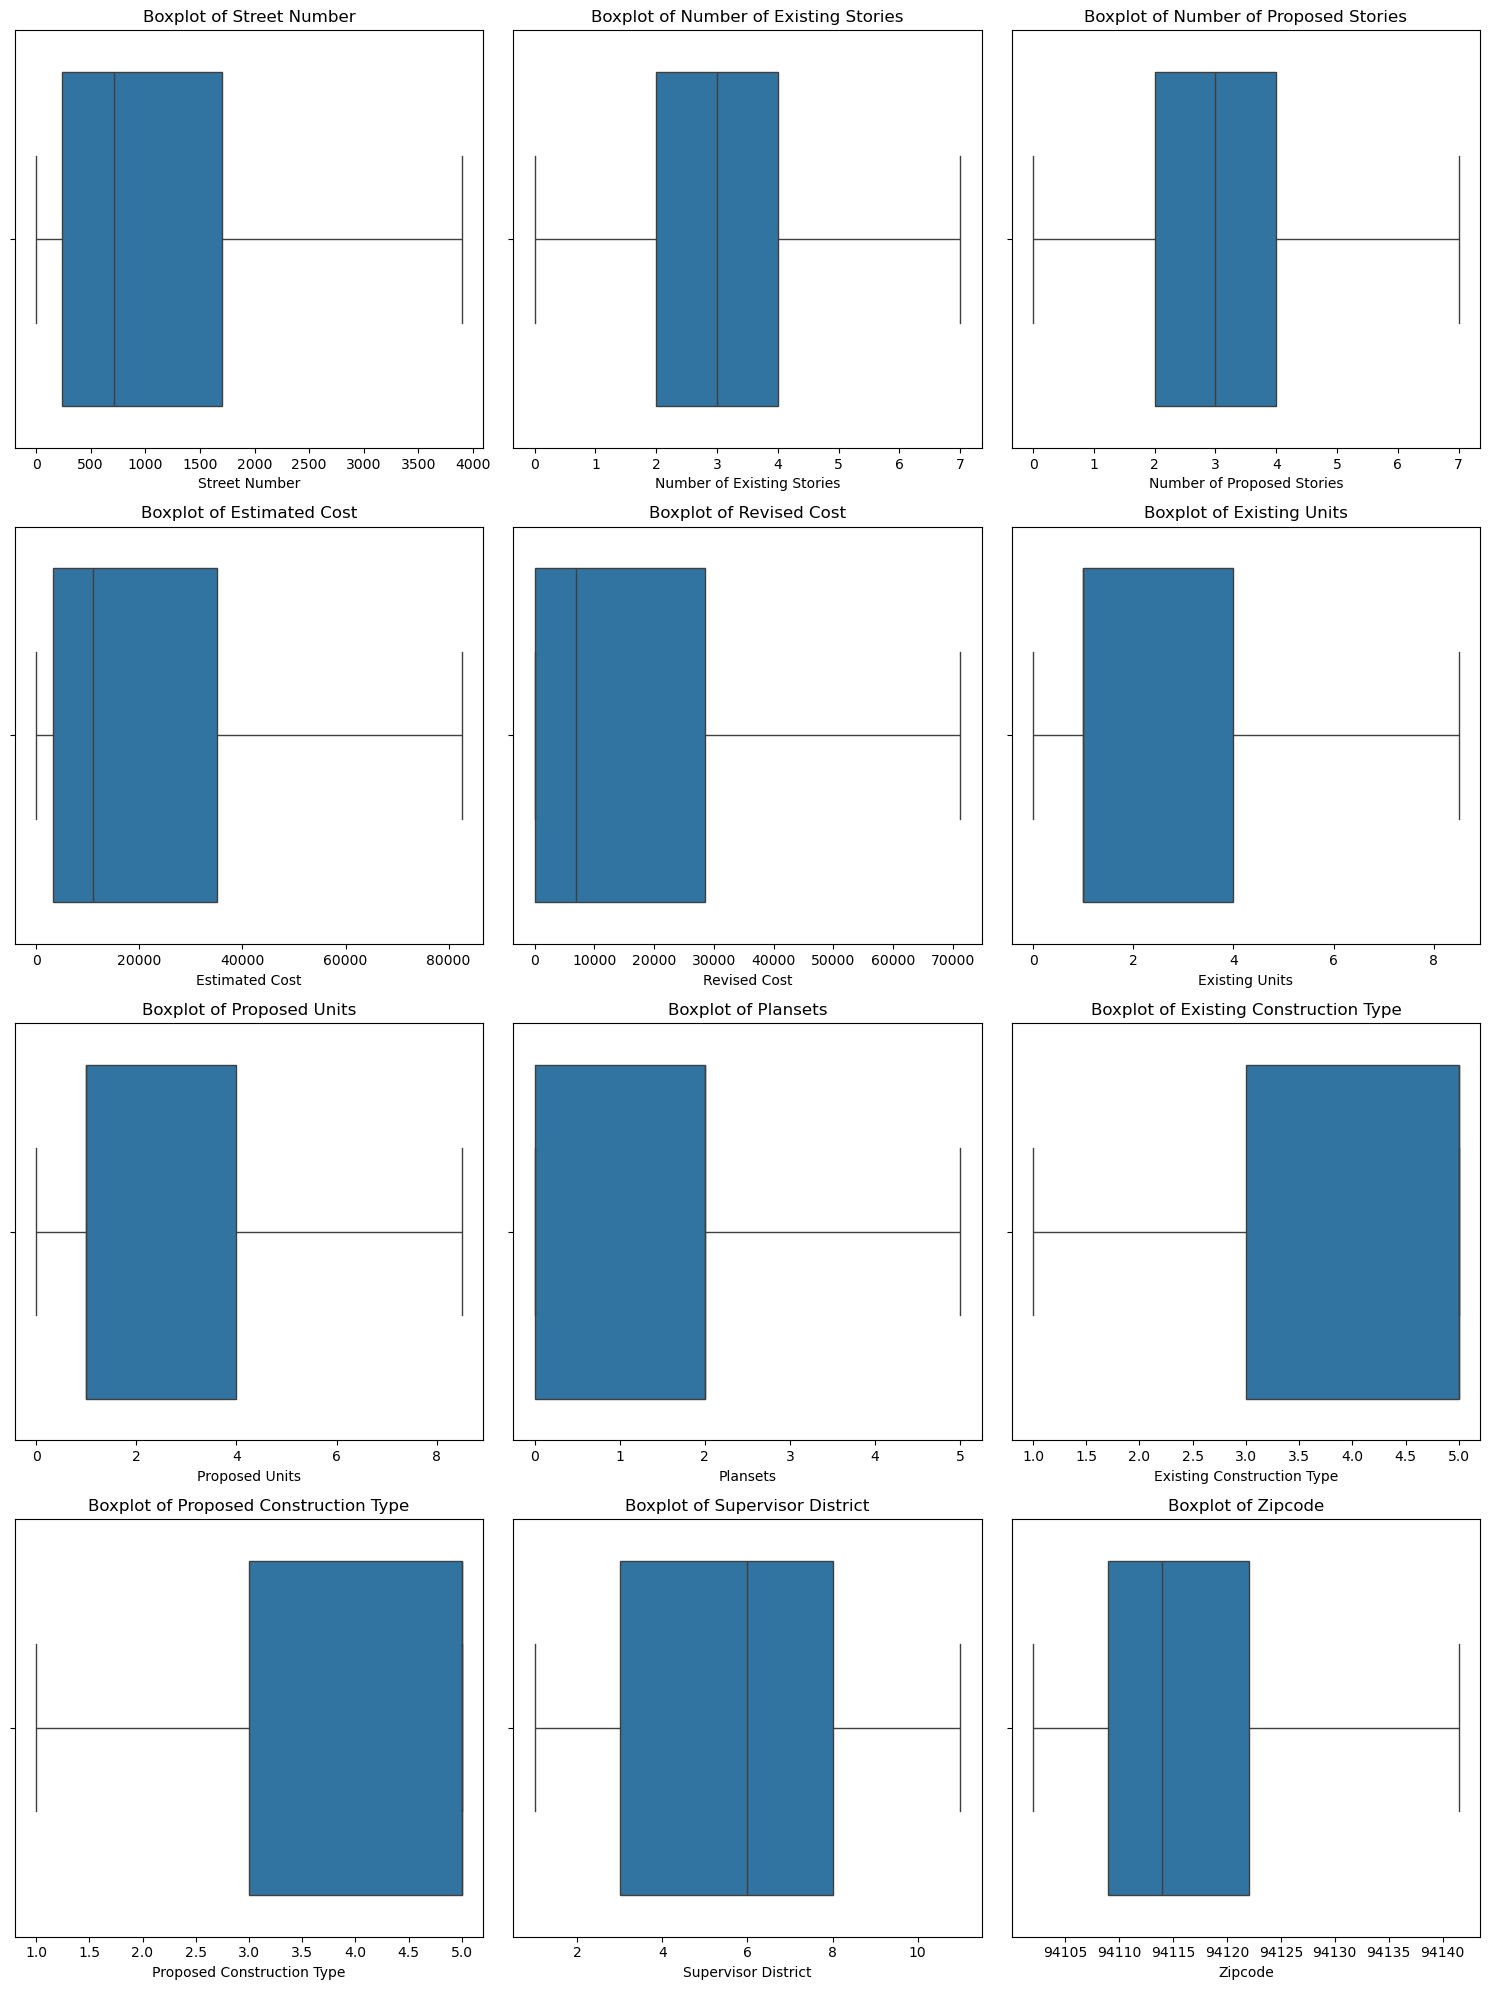

In [55]:
num_columns = len(numeric_data.columns)
num_rows = int(np.ceil(num_columns / 3))
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=numeric_data[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Hexbin_Plot

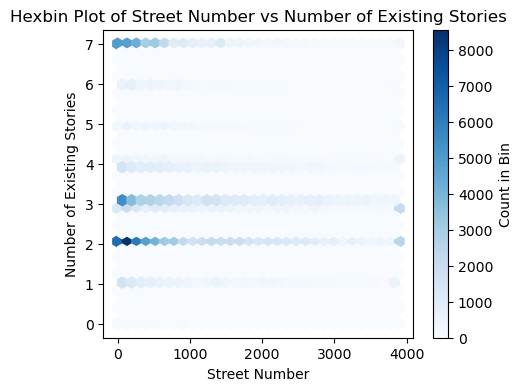

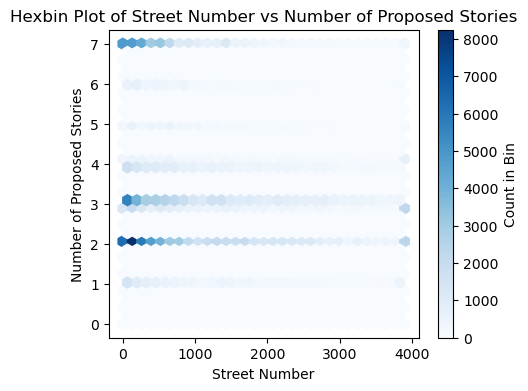

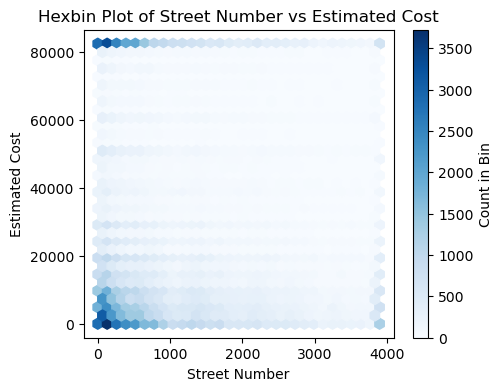

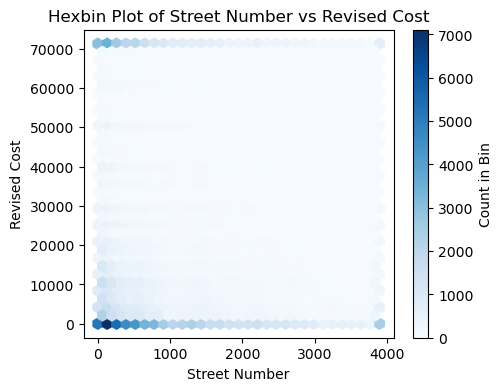

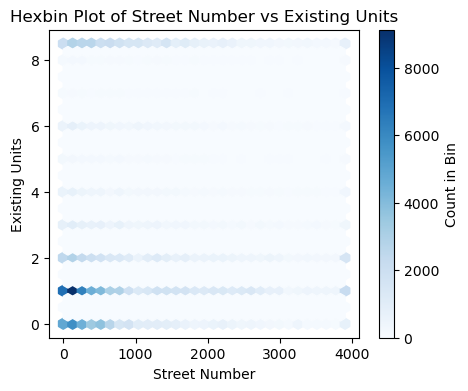

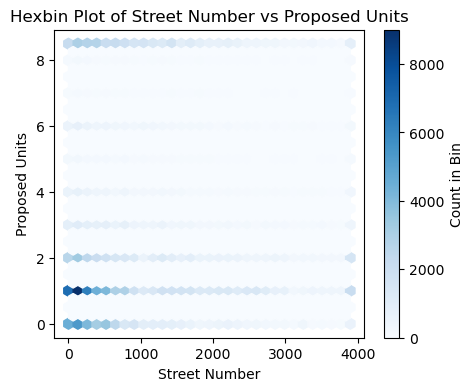

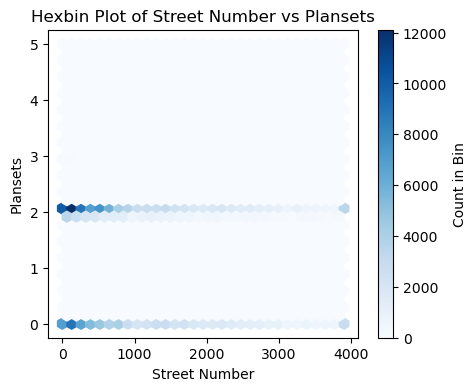

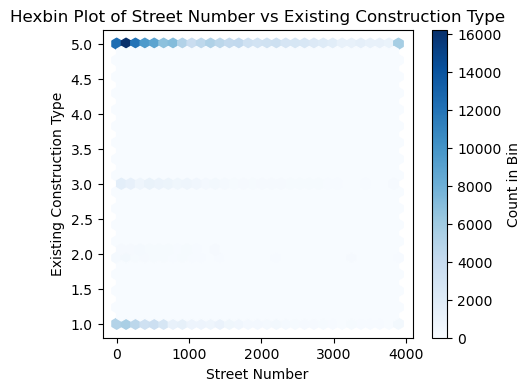

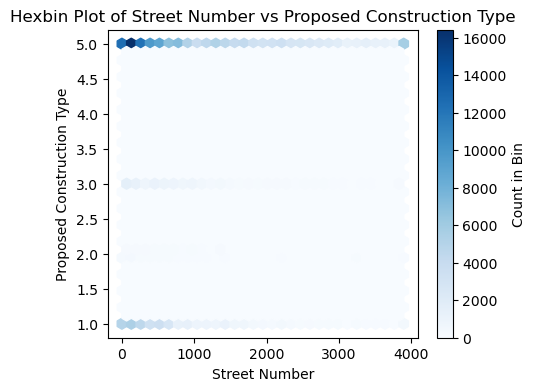

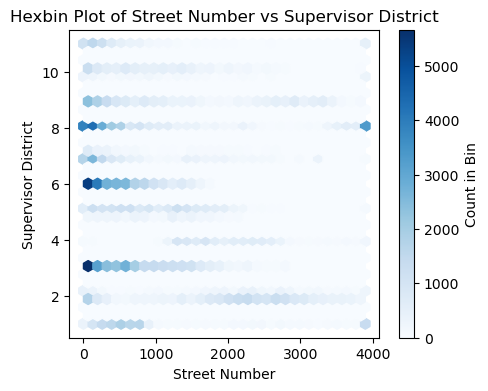

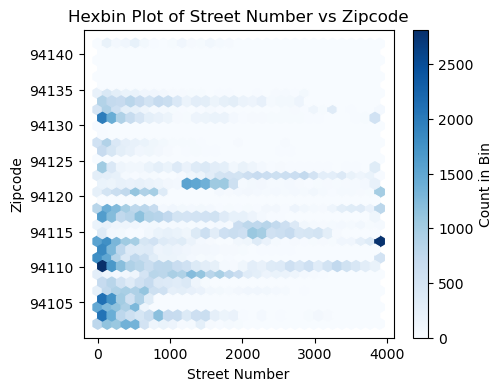

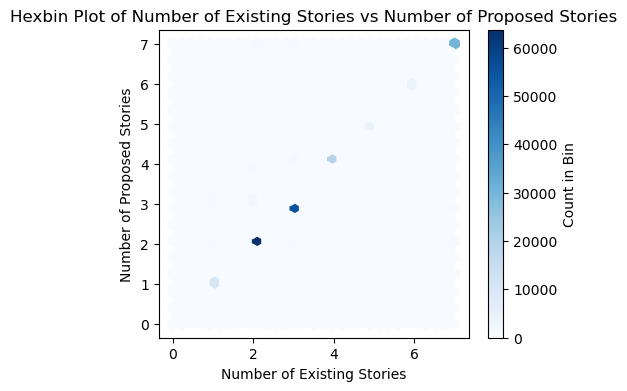

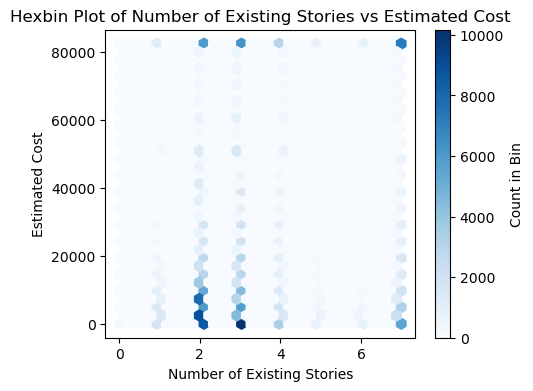

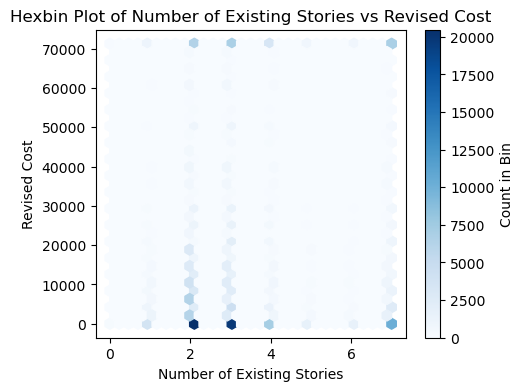

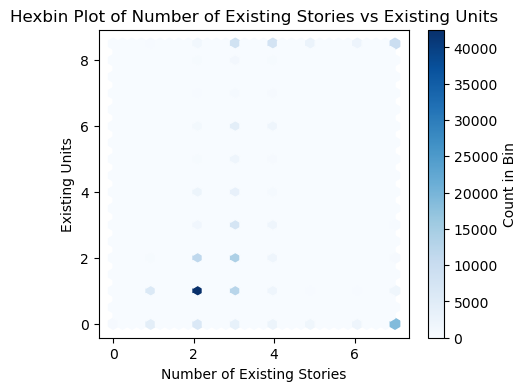

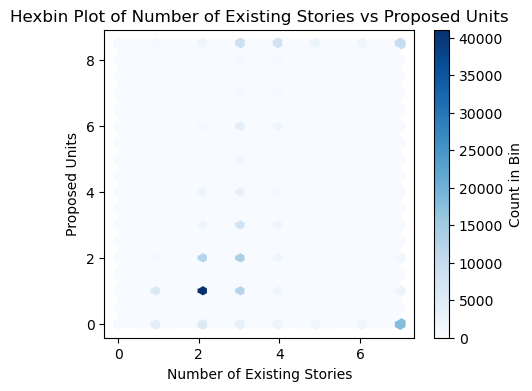

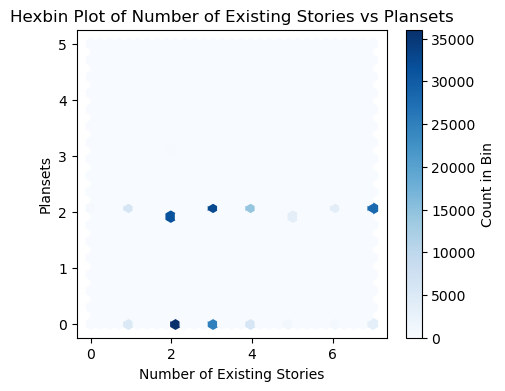

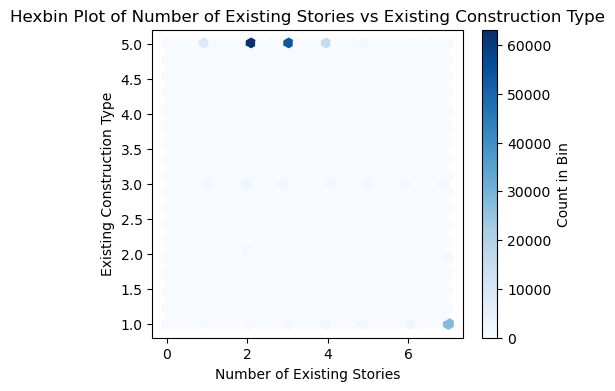

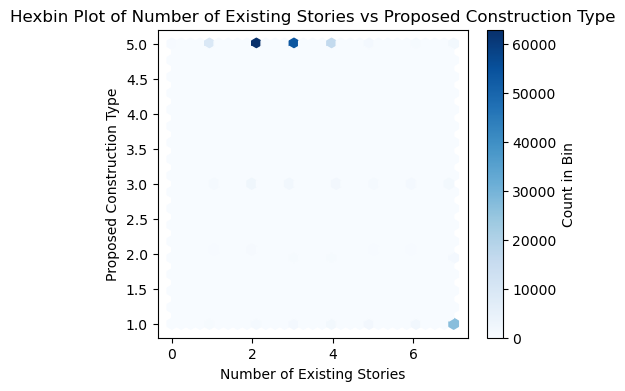

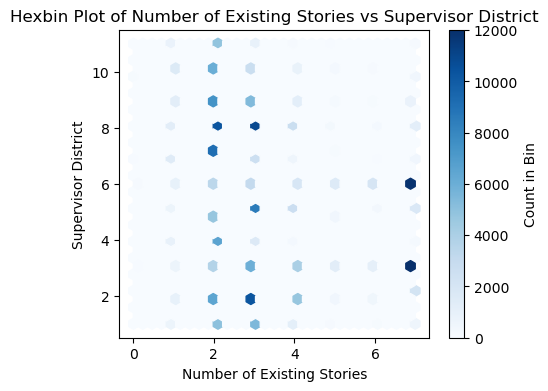

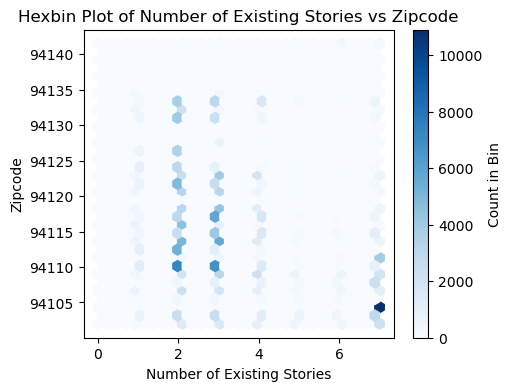

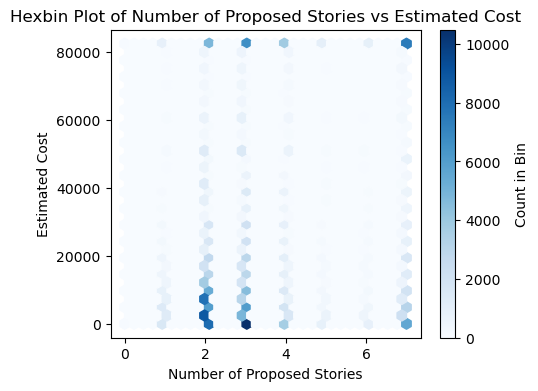

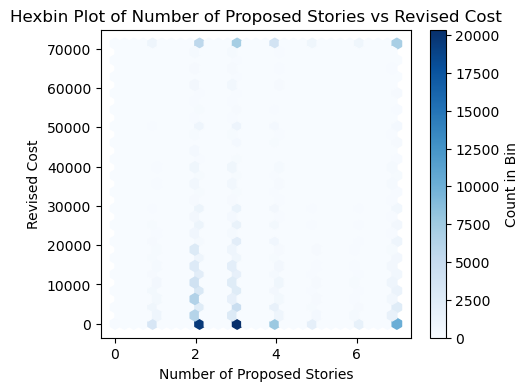

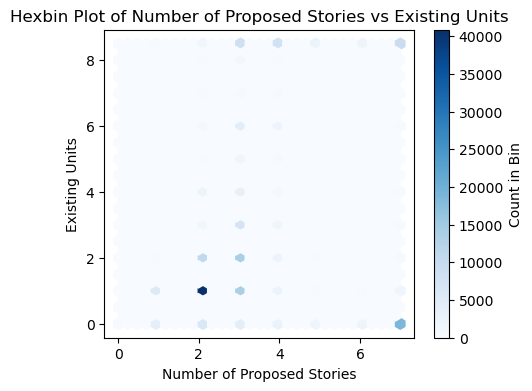

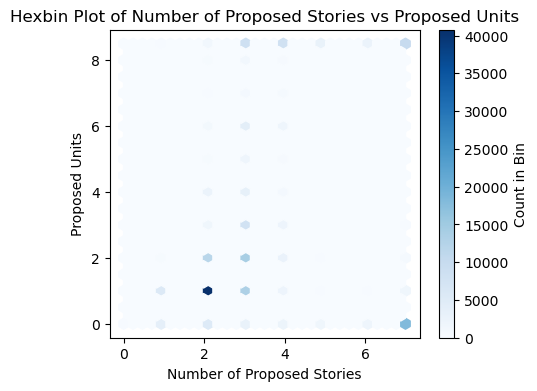

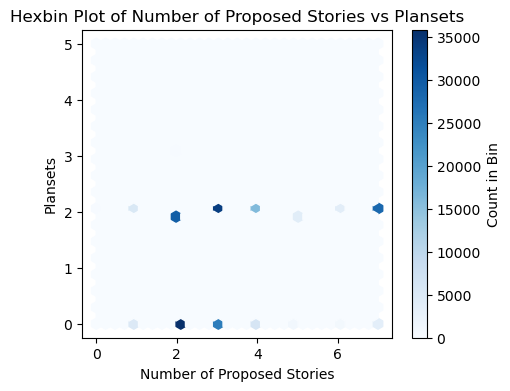

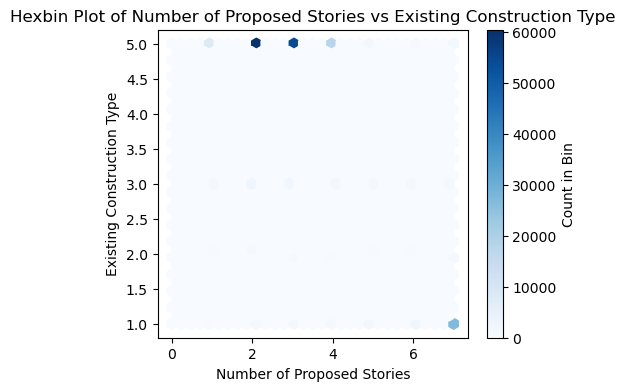

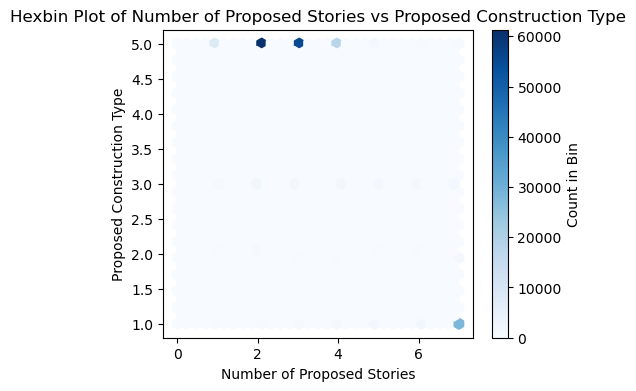

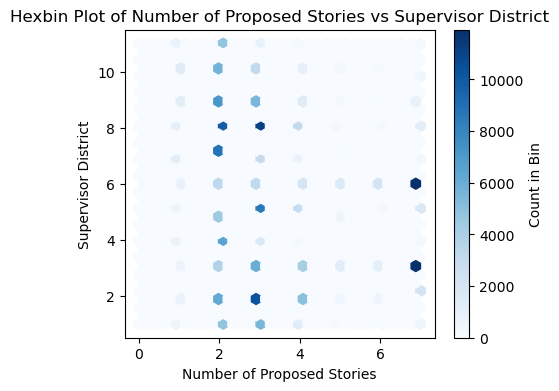

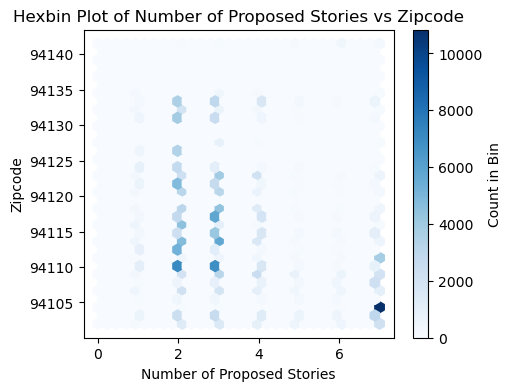

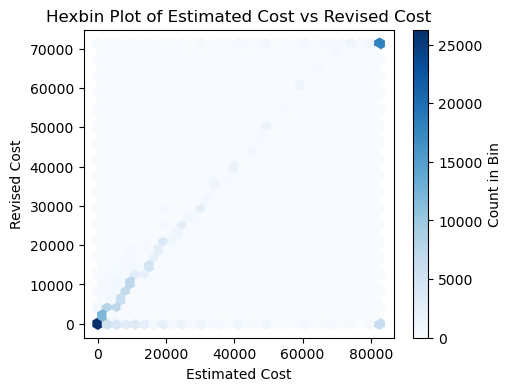

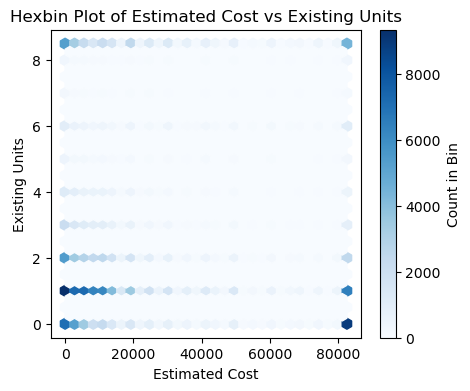

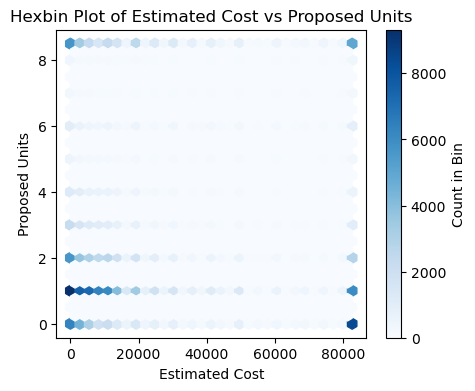

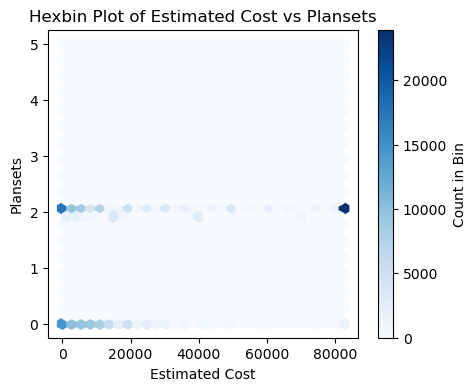

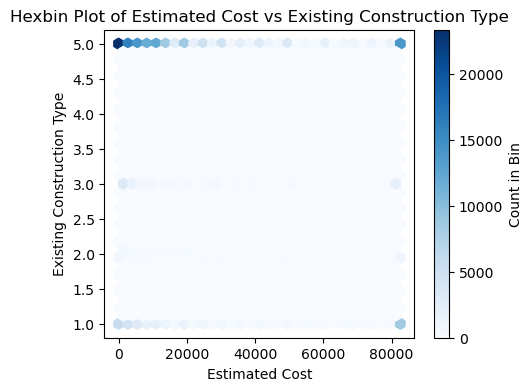

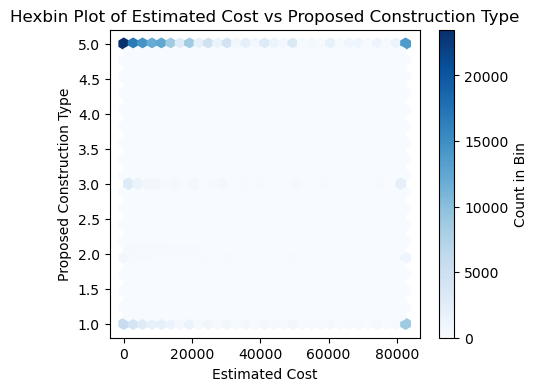

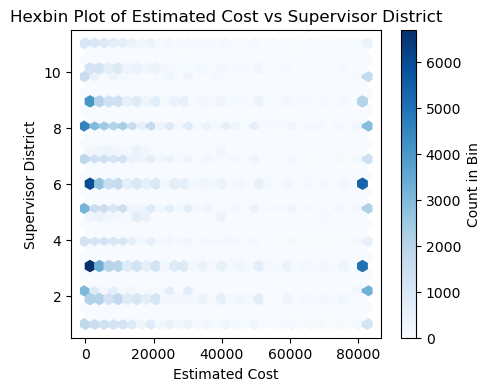

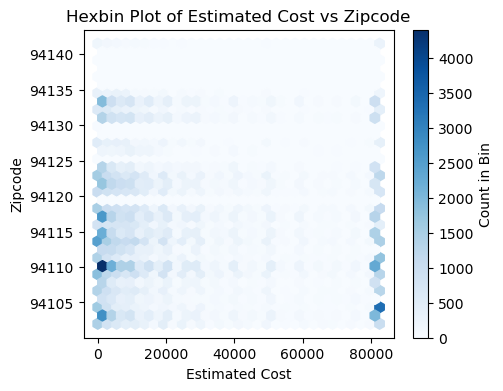

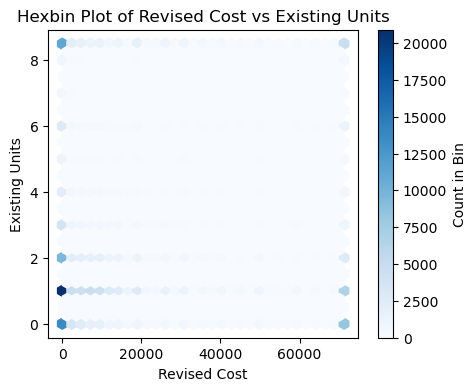

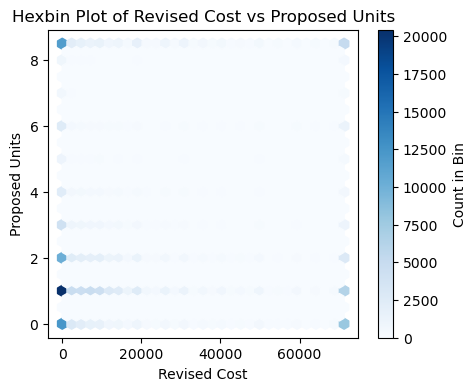

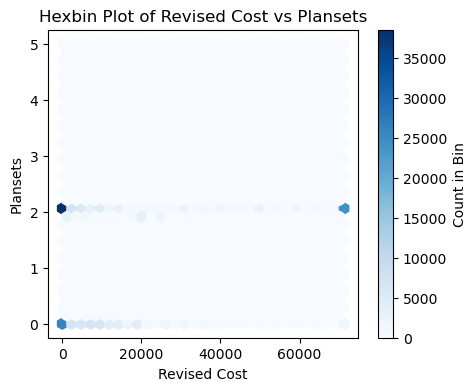

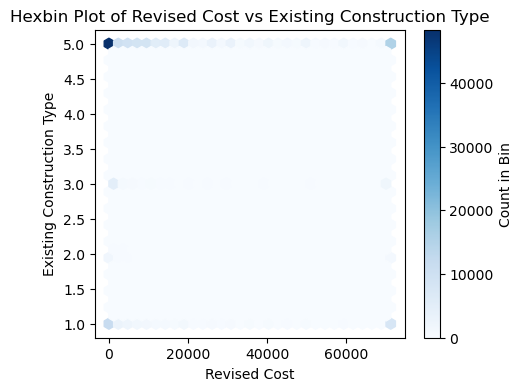

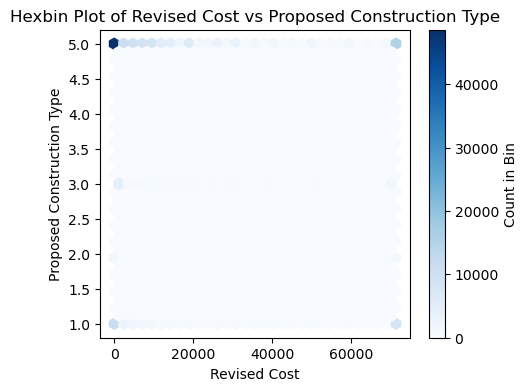

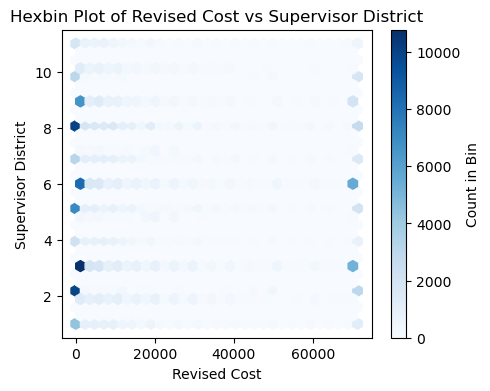

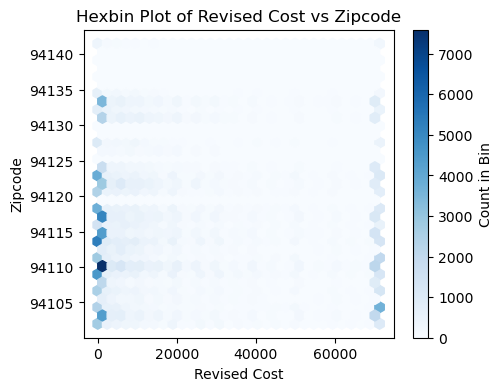

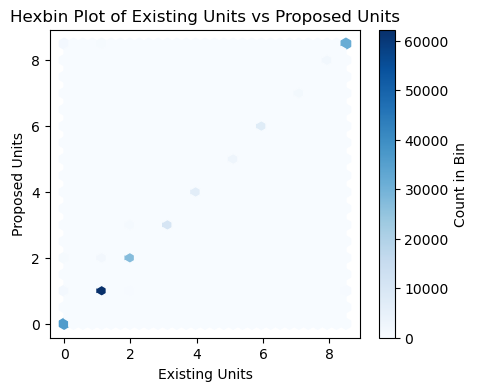

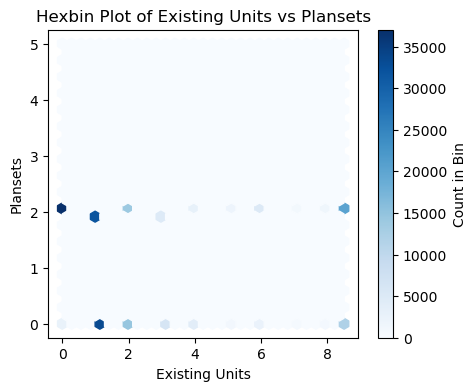

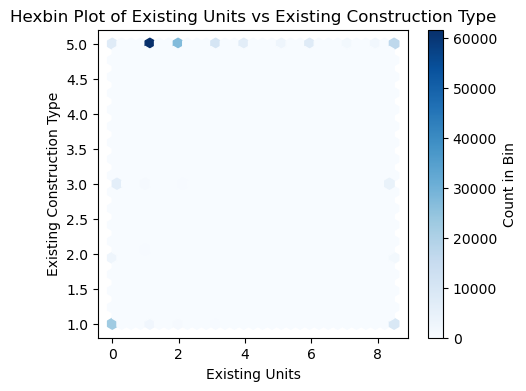

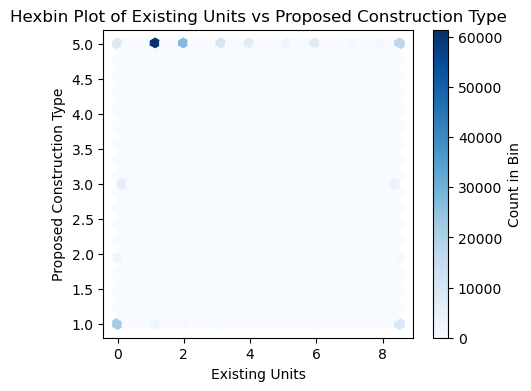

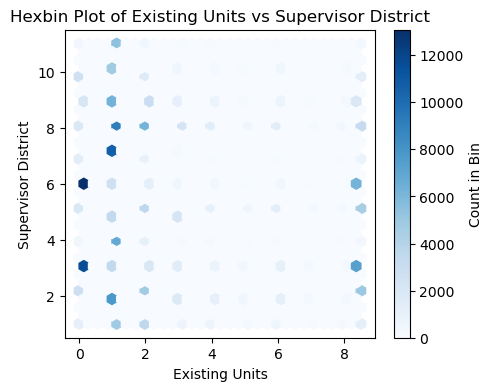

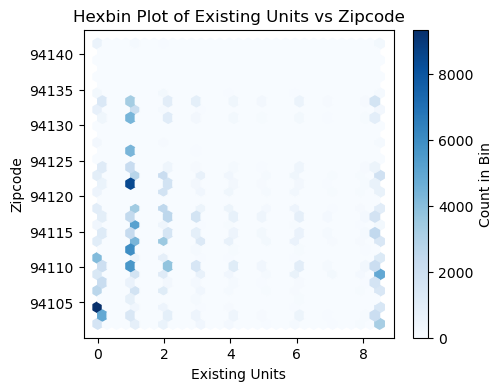

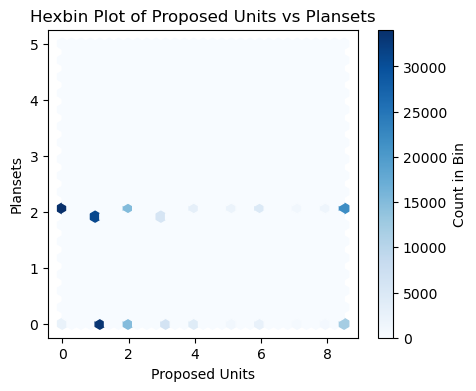

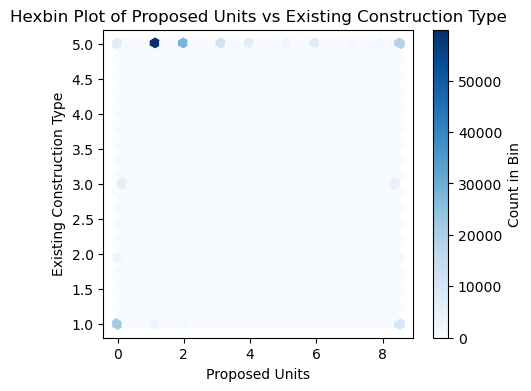

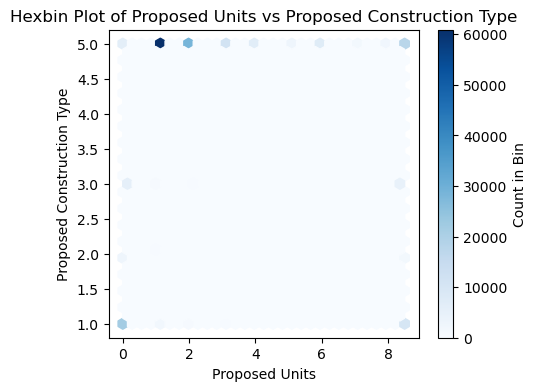

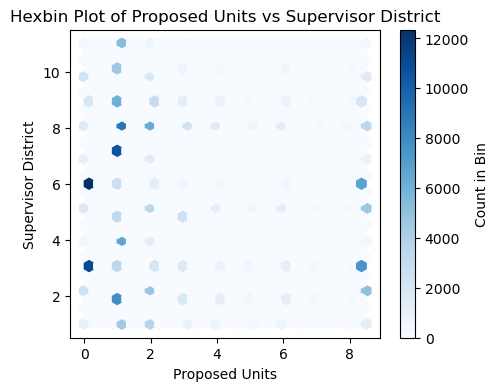

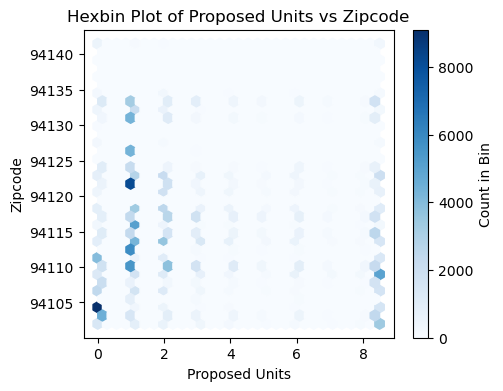

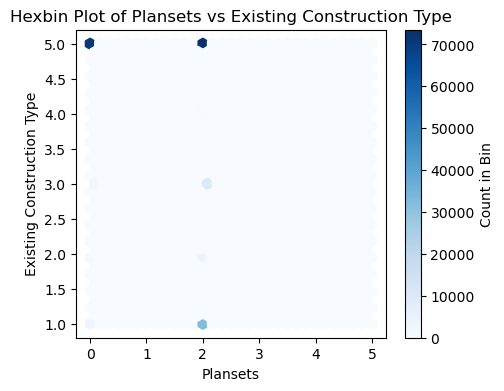

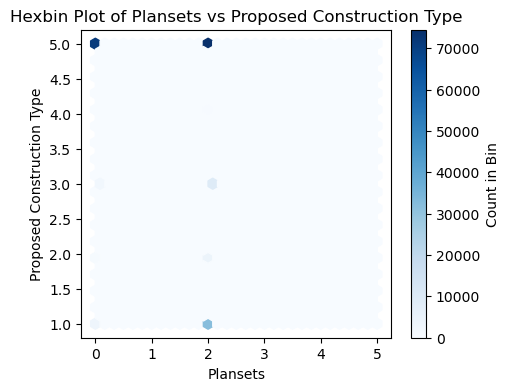

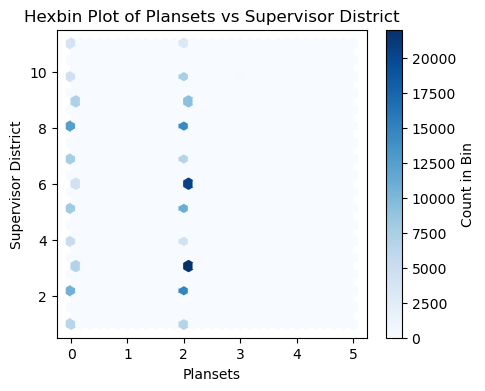

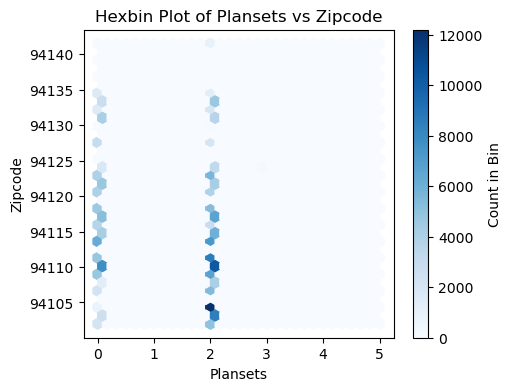

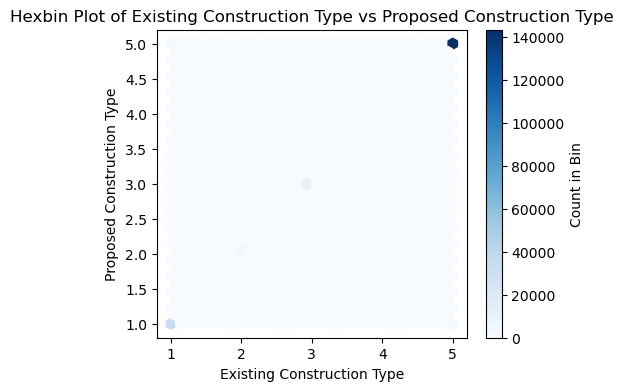

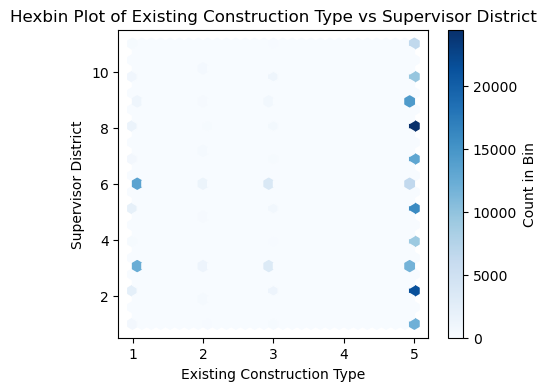

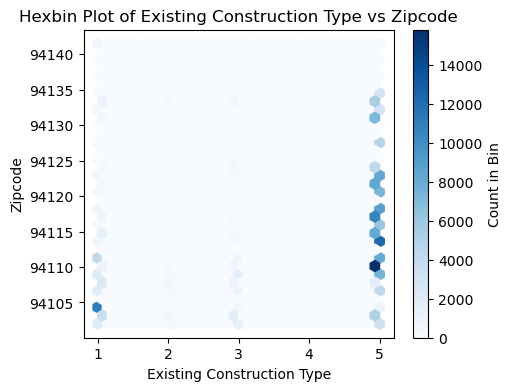

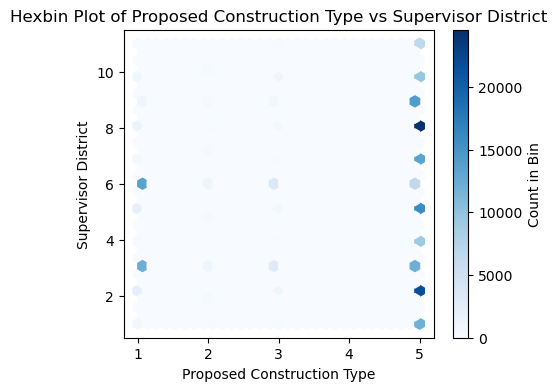

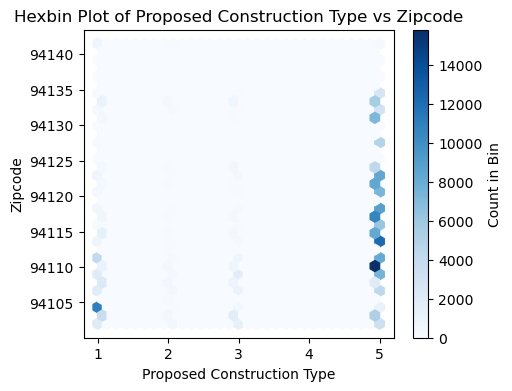

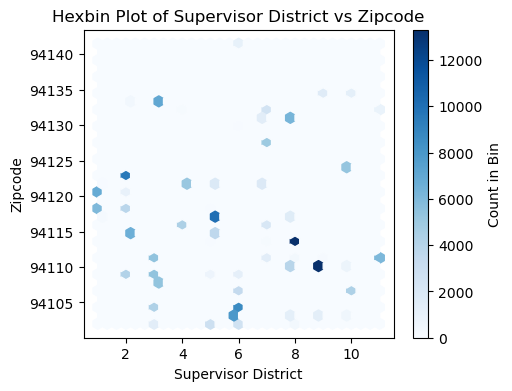

In [57]:
import itertools
numeric_cols = numeric_data.columns
column_pairs = list(itertools.combinations(numeric_cols, 2))
for col1, col2 in column_pairs:
    plt.figure(figsize=(5, 4))
    plt.hexbin(numeric_data[col1], numeric_data[col2], gridsize=30, cmap="Blues")
    plt.colorbar(label="Count in Bin")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Hexbin Plot of {col1} vs {col2}")
    plt.show()

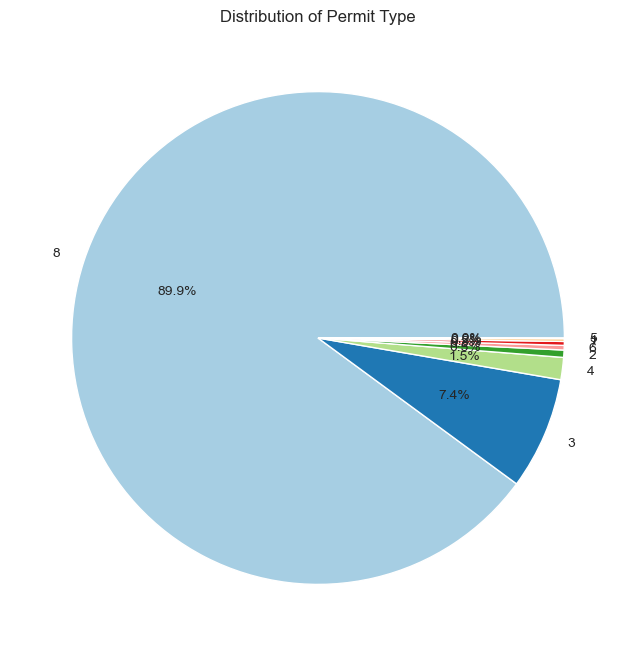

In [149]:
column = 'Permit Type'
category_counts = clean_data[column].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title(f"Distribution of {column}")
plt.show()

## Bivariate Analysis

In [60]:
corr_matrix = numeric_data.corr()
print(corr_matrix)

                            Street Number  Number of Existing Stories  \
Street Number                    1.000000                   -0.161597   
Number of Existing Stories      -0.161597                    1.000000   
Number of Proposed Stories      -0.155734                    0.938911   
Estimated Cost                  -0.026466                    0.133775   
Revised Cost                    -0.048155                    0.107974   
Existing Units                   0.065142                    0.197740   
Proposed Units                   0.065217                    0.180469   
Plansets                        -0.054005                    0.289289   
Existing Construction Type       0.183360                   -0.783552   
Proposed Construction Type       0.180599                   -0.750233   
Supervisor District             -0.135480                   -0.201727   
Zipcode                          0.112721                   -0.335064   

                            Number of Proposed Sto

In [61]:
#print(categorical_data)
categorical_columns=categorical_data.columns
print(categorical_columns)

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Name', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Permit Expiration Date',
       'Existing Use', 'Proposed Use', 'Neighborhoods - Analysis Boundaries',
       'Location'],
      dtype='object')


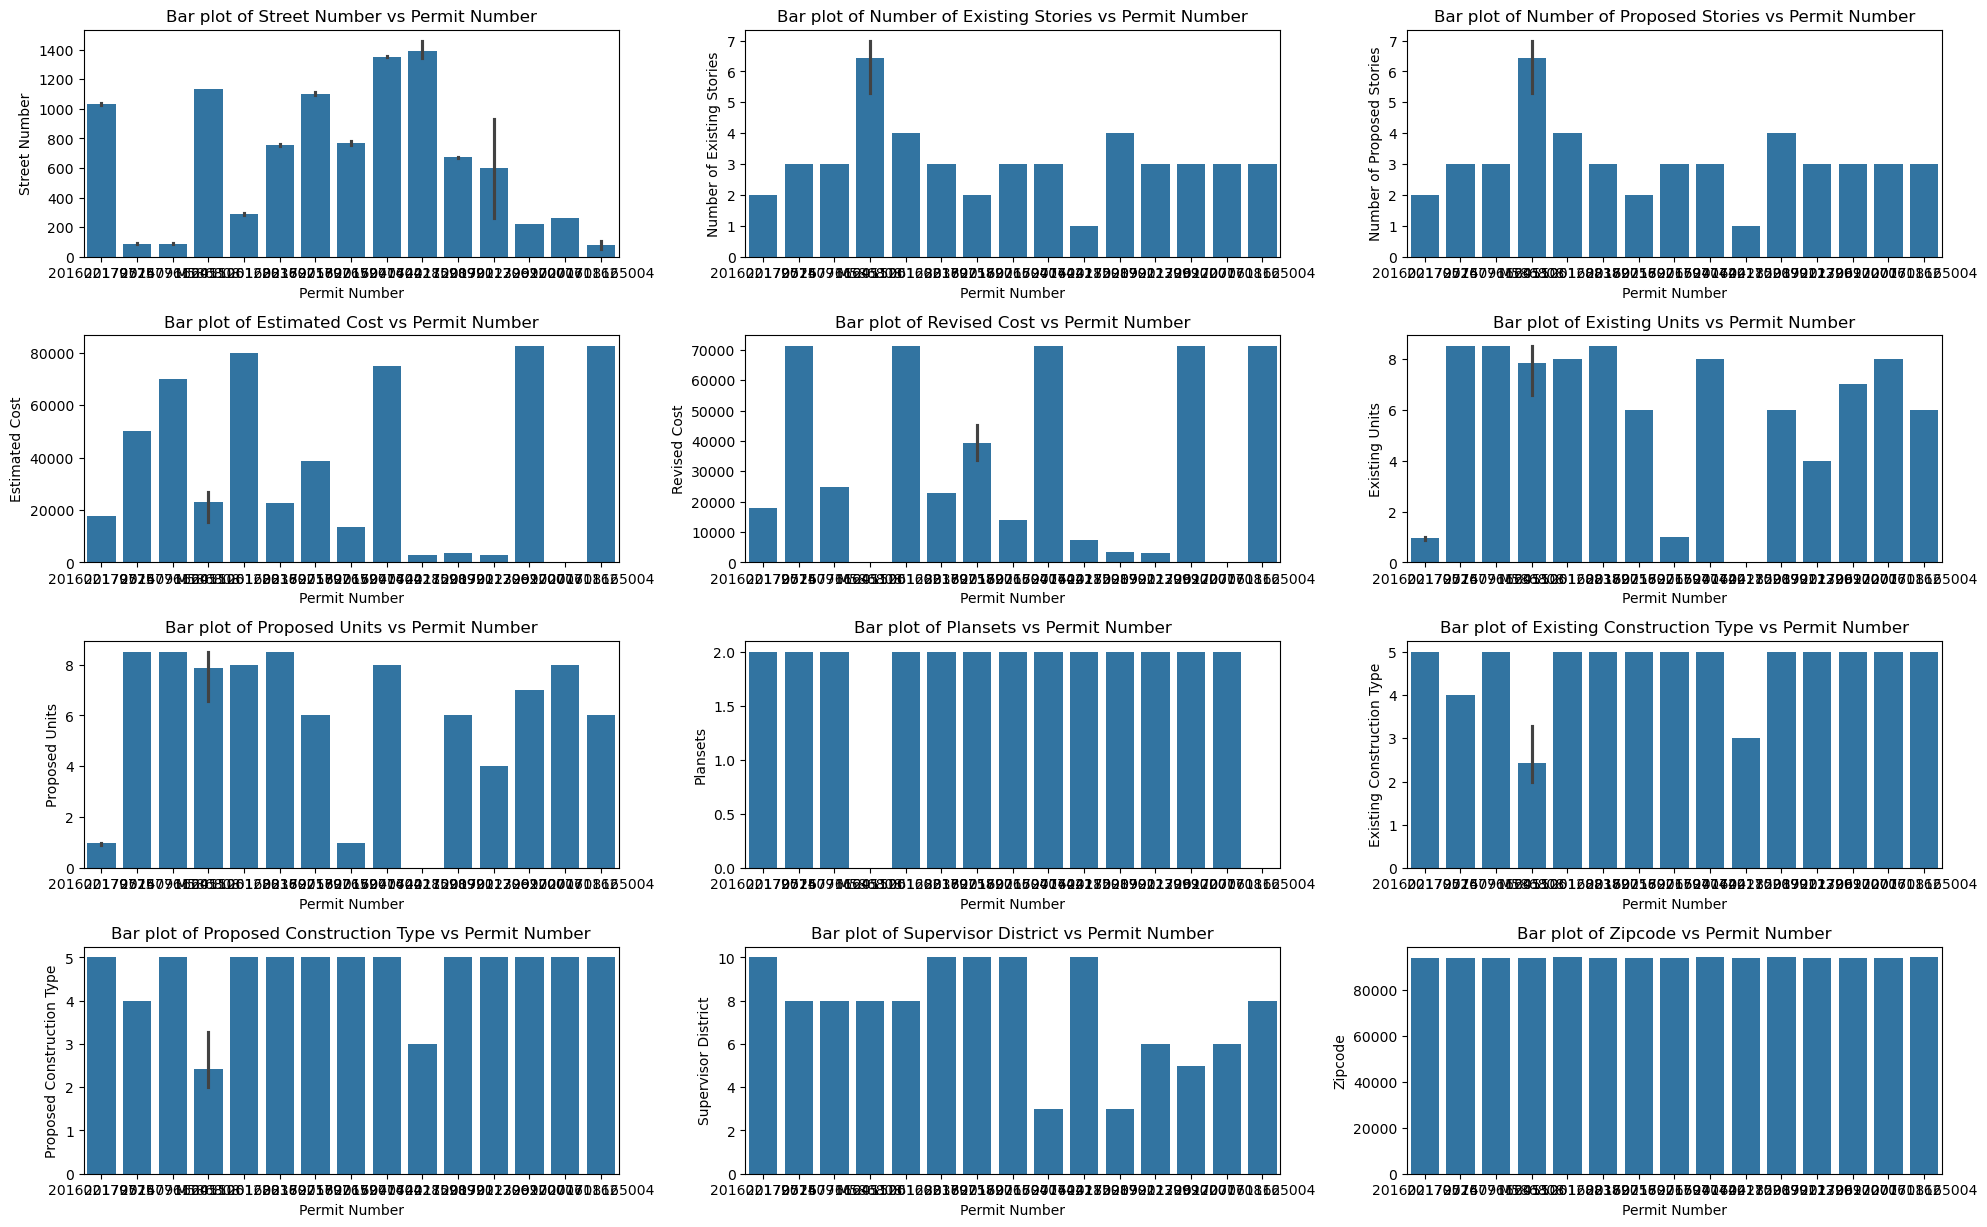

In [62]:
plt.figure(figsize=(20, 15))
top_categories = clean_data[categorical_columns[0]].value_counts().index[:15]
subset_data = clean_data[clean_data[categorical_columns[0]].isin(top_categories)]
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(len(numeric_data.columns) // 3 + 1, 3, i)
    sns.barplot(x=categorical_columns[0], y=column, data=subset_data)
    plt.title(f'Bar plot of {column} vs {categorical_columns[0]}')
plt.tight_layout()
plt.show()

Box_plot

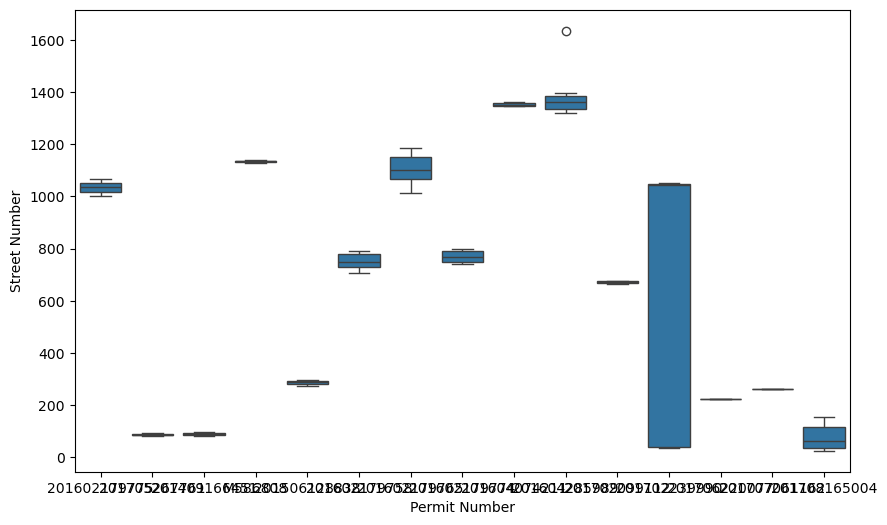

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(x=categorical_columns[0], y=numeric_data.columns[0], data=subset_data)
plt.show()

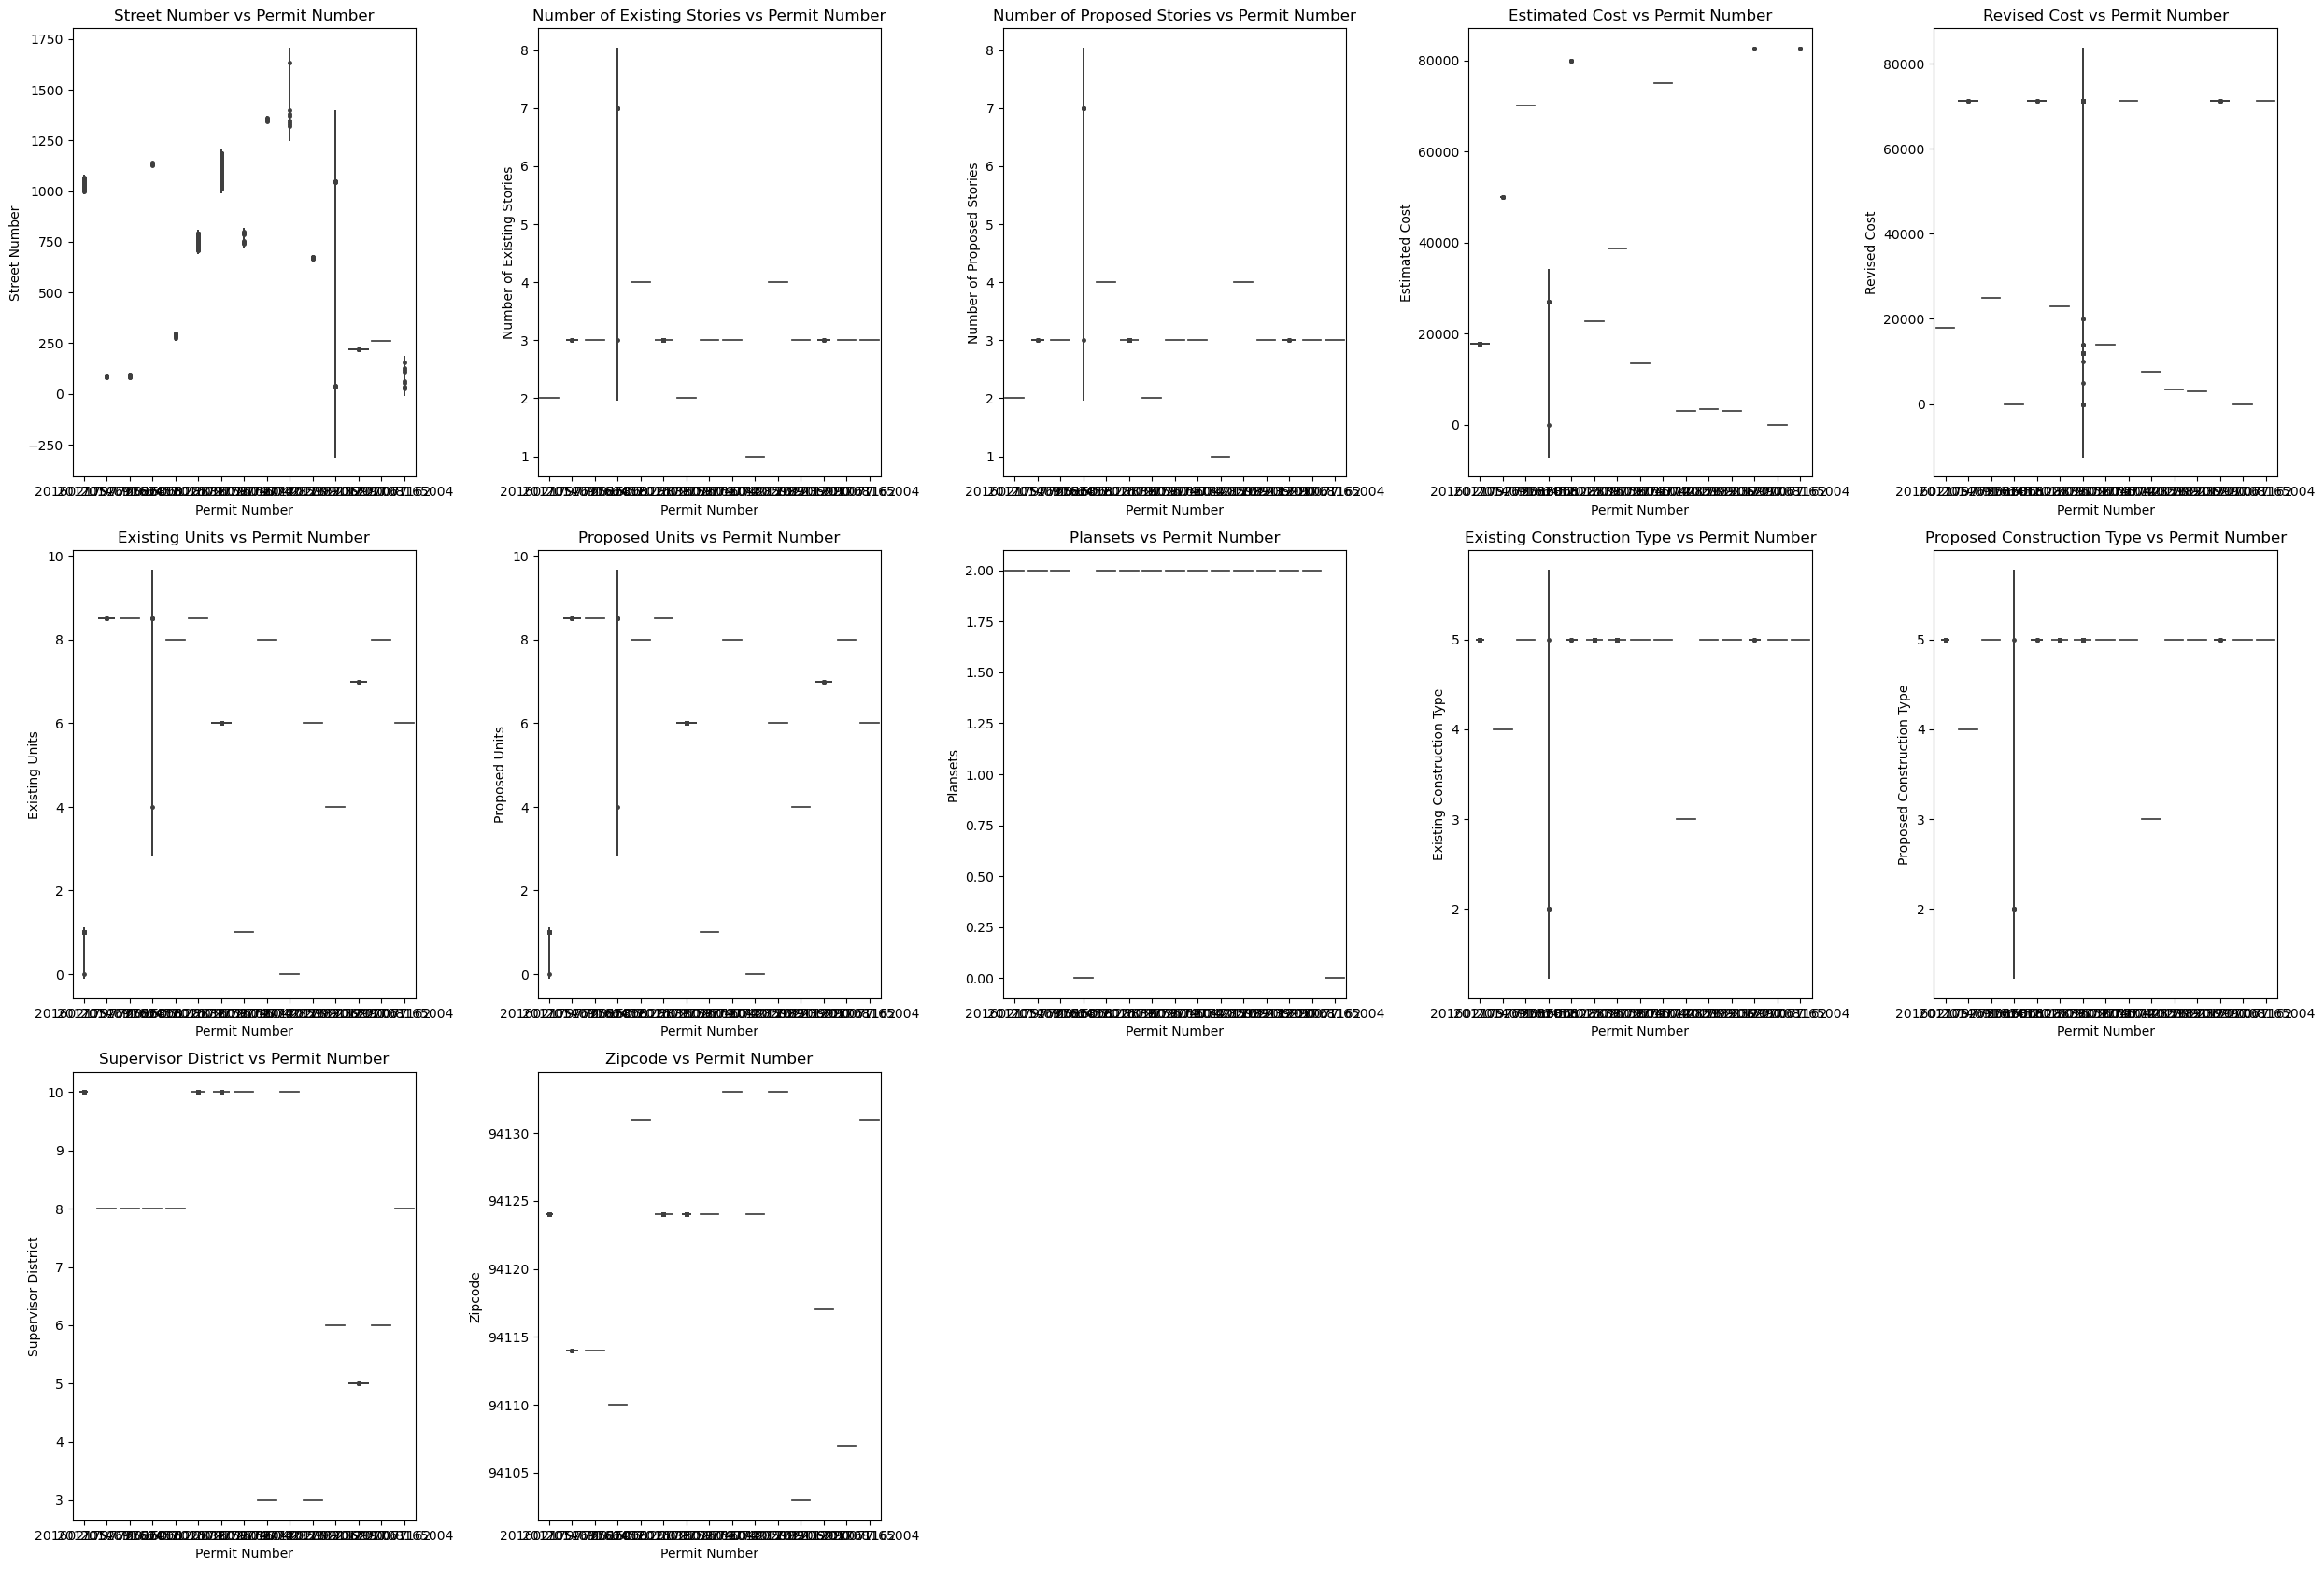

In [65]:
plt.figure(figsize=(25, 50))
selected_numeric_columns = numeric_data.columns[:45]  
rows, cols = 9, 5  

for i, column in enumerate(selected_numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(x=categorical_columns[0], y=column, data=subset_data, inner='point', bw_adjust=0.5)
    plt.title(f'{column} vs {categorical_columns[0]}')

plt.tight_layout()
plt.show()

### Swarm_plot

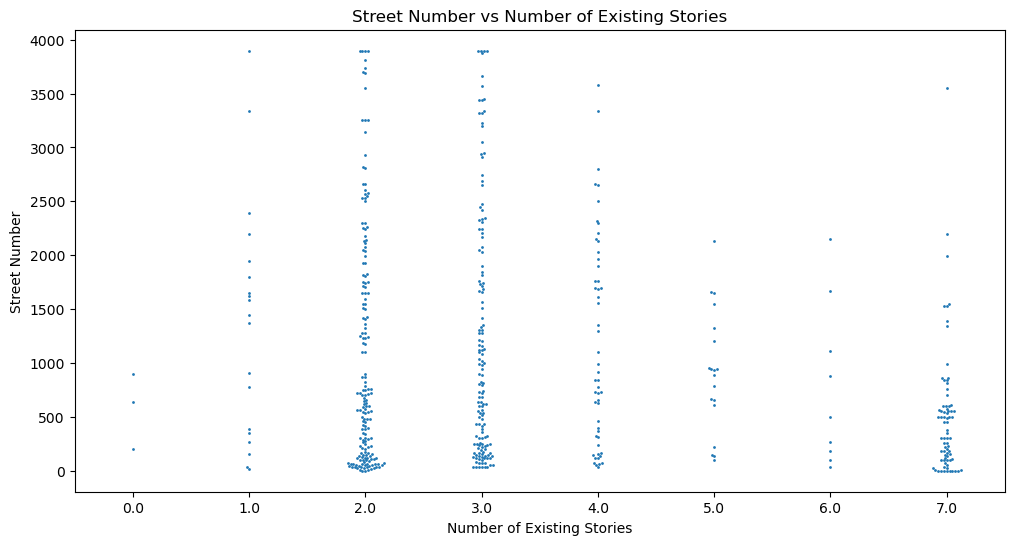

In [67]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Number of Existing Stories', y='Street Number', data=clean_data.sample(500), size=2)  
plt.title('Street Number vs Number of Existing Stories')
plt.show()

### Joint Plot(reg)

<Figure size 1000x500 with 0 Axes>

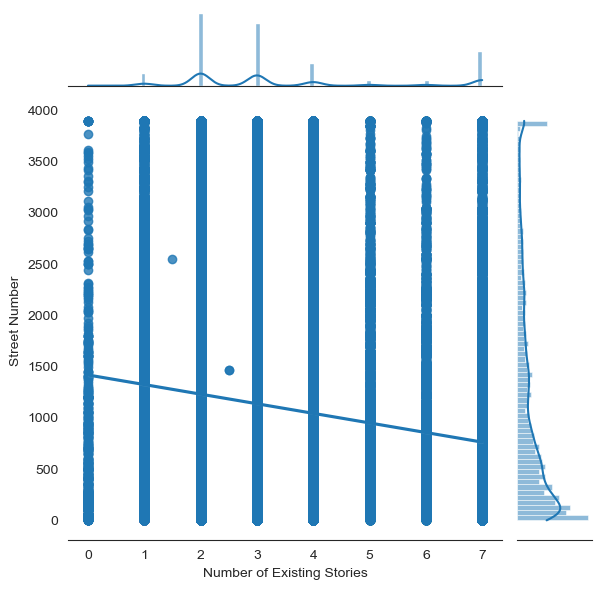

In [69]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.jointplot(x='Number of Existing Stories', y='Street Number', data=clean_data, kind='reg') 
sns.despine(left=True,right=True)

## Multivariate_Analysis

<Figure size 1200x600 with 0 Axes>

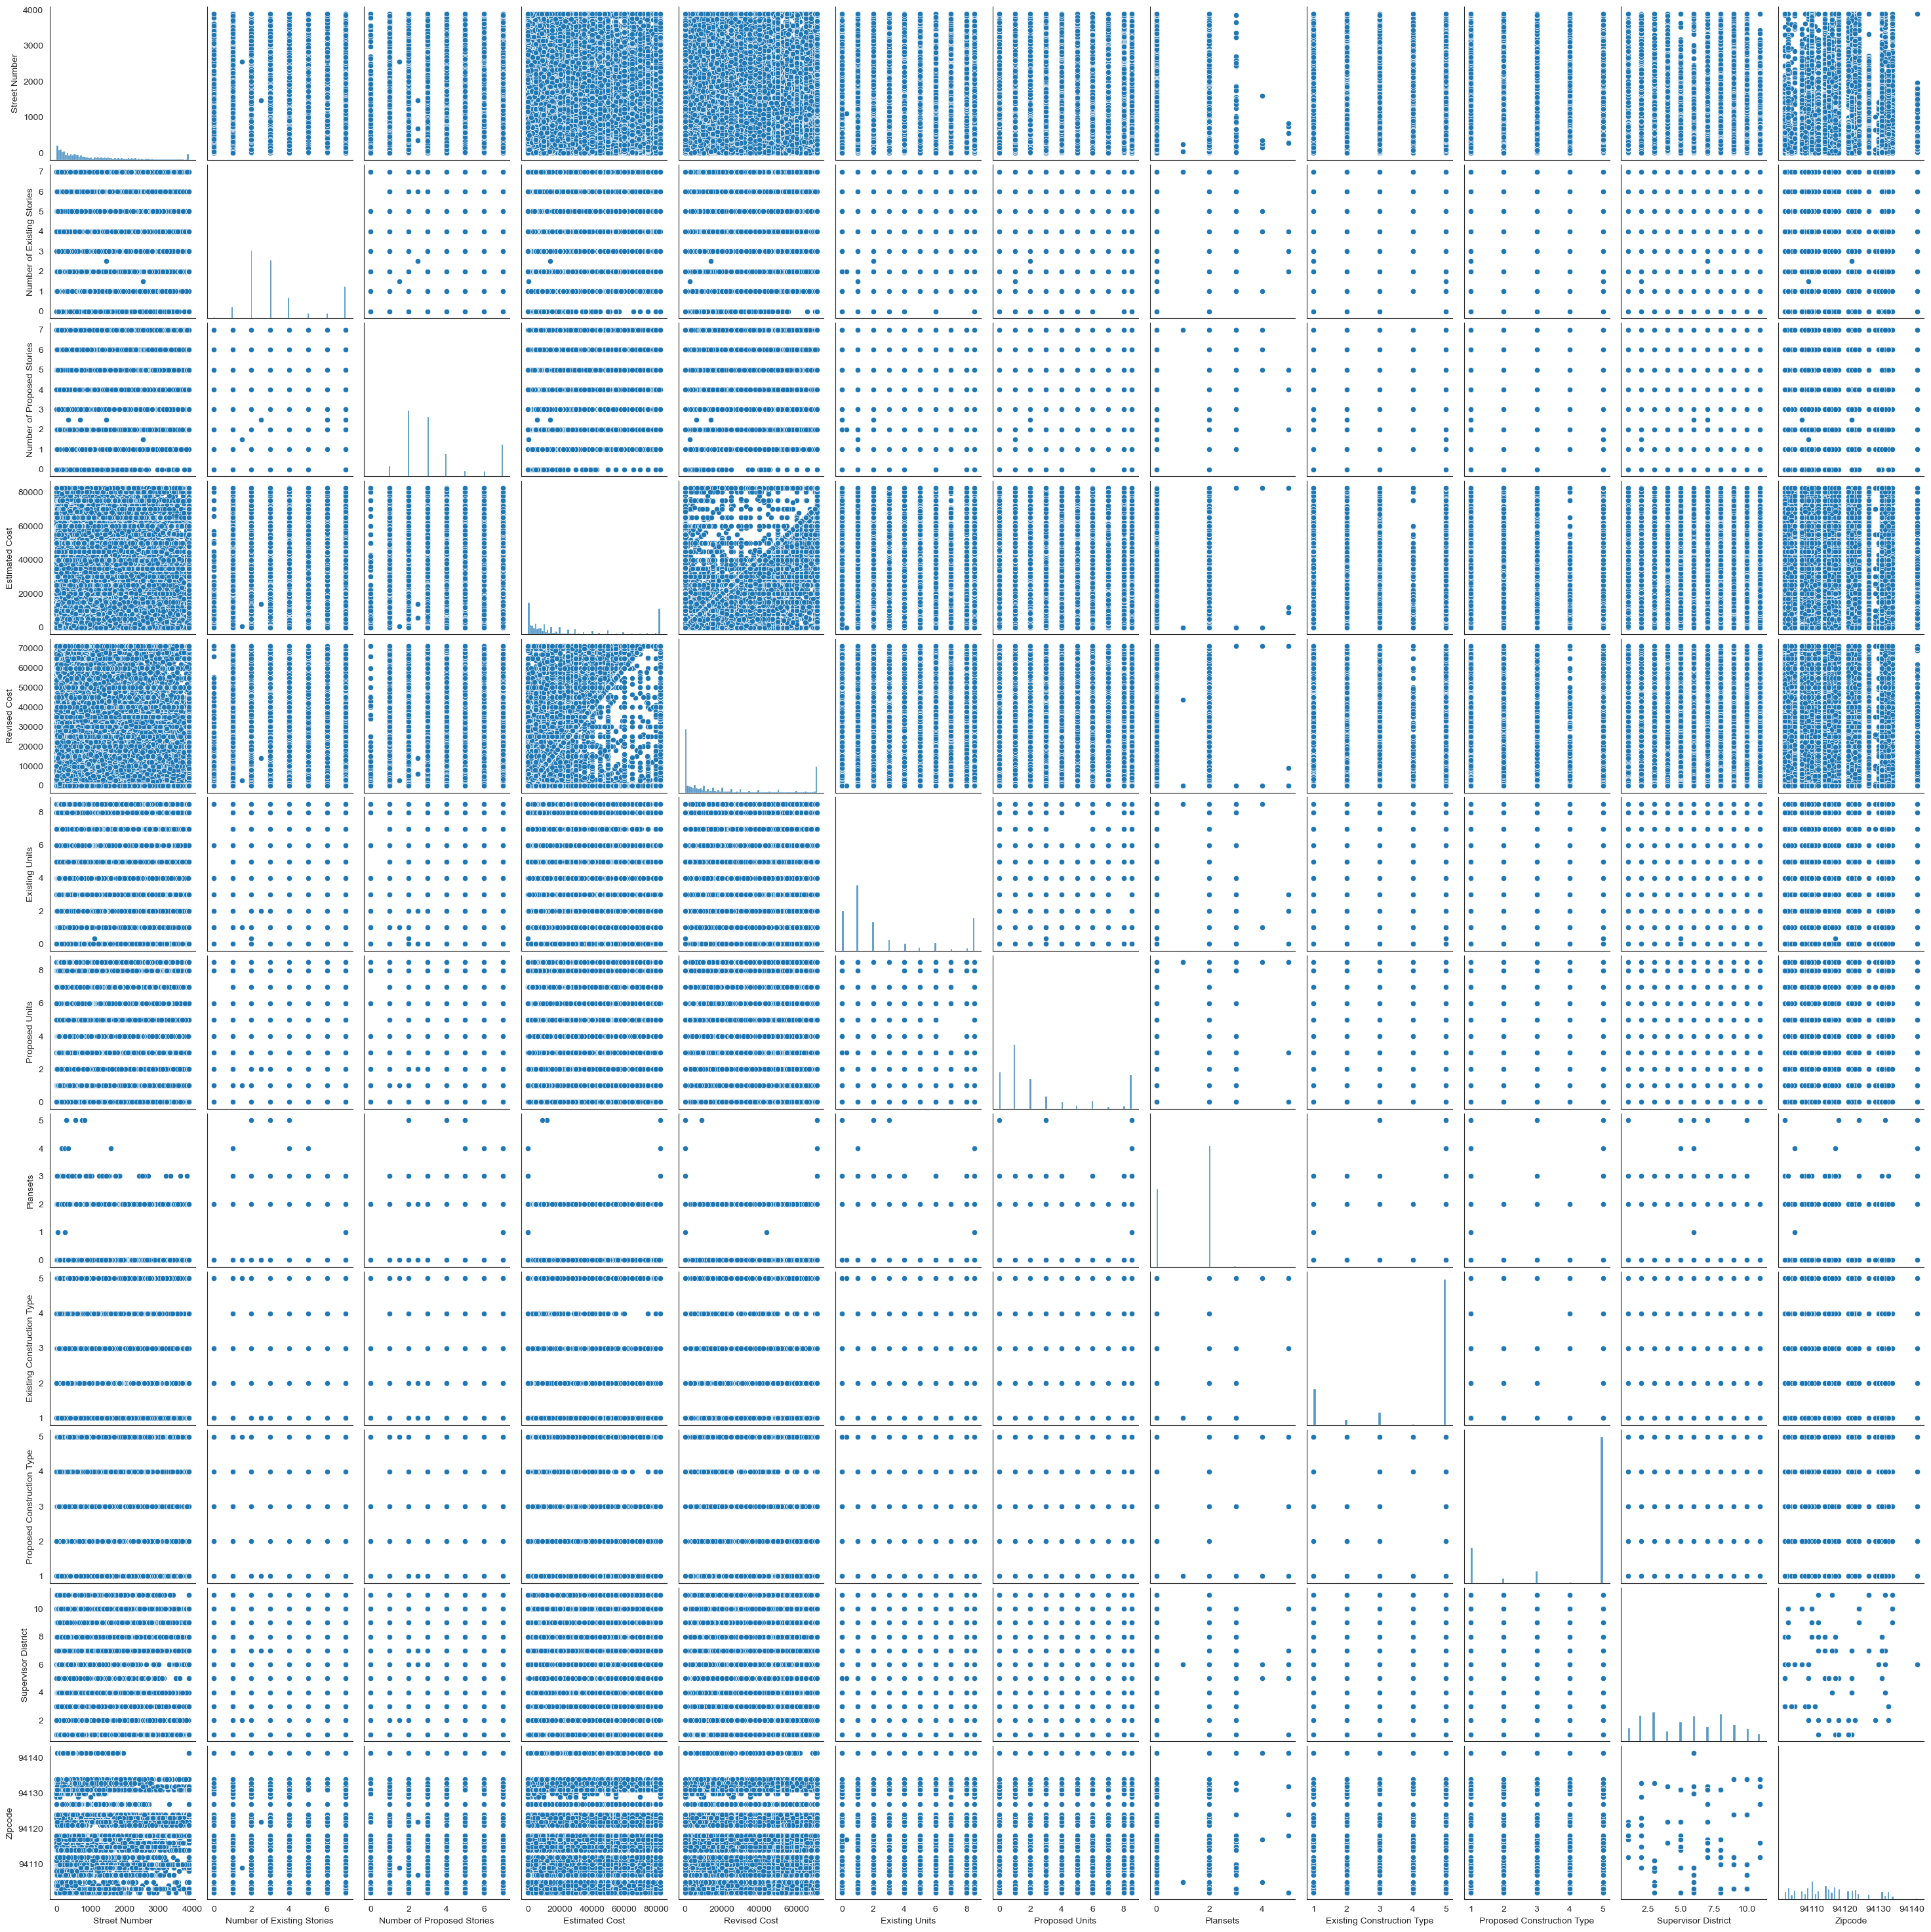

In [71]:
plt.figure(figsize=(12,6))
sns.pairplot(numeric_data) 
plt.show()

### Heat Map

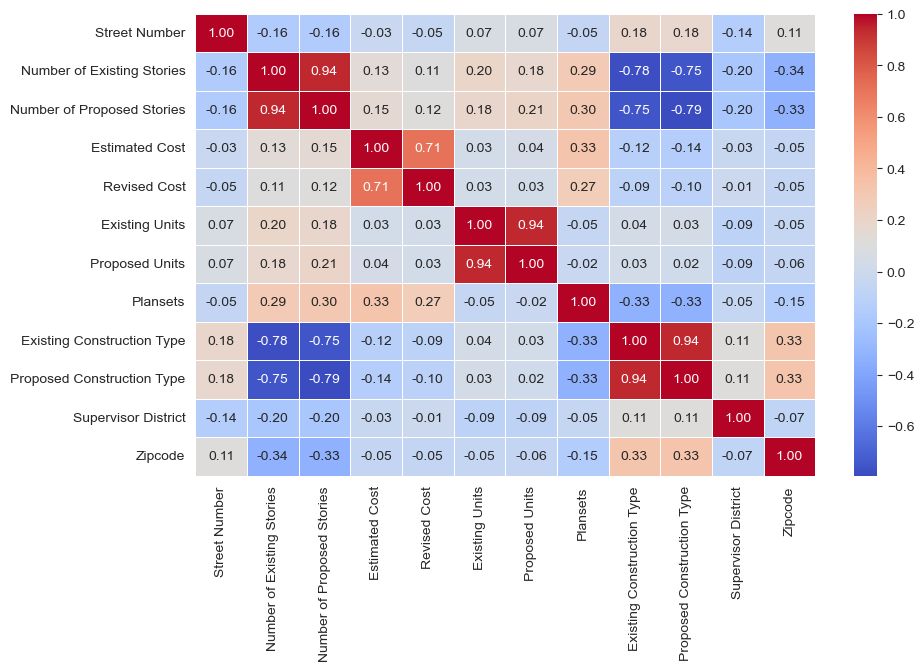

In [73]:
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [74]:
subset_data = clean_data.sample(n=400, random_state=42) 

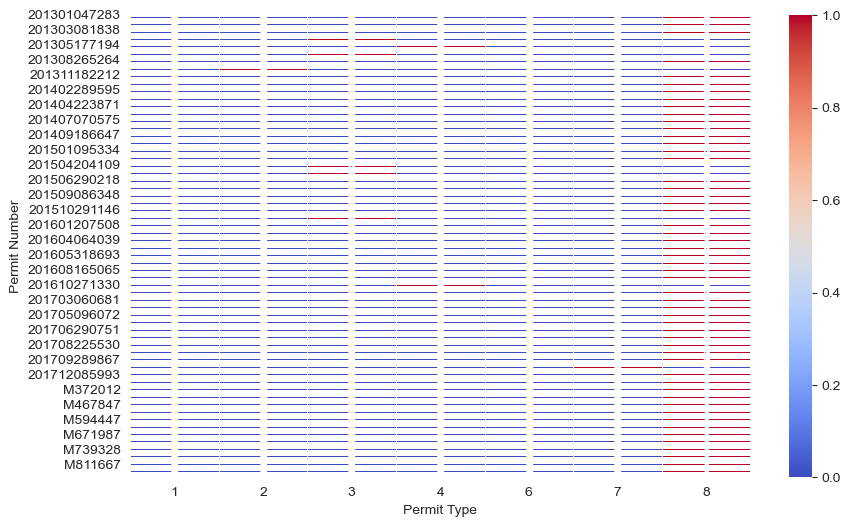

In [75]:
pivot_table = subset_data.pivot_table(index=categorical_columns[0], columns=categorical_columns[1], aggfunc="size", fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

## Grouped Categories

In [77]:
print(categorical_columns)

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Name', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Permit Expiration Date',
       'Existing Use', 'Proposed Use', 'Neighborhoods - Analysis Boundaries',
       'Location'],
      dtype='object')


In [78]:
print(numeric_data.columns)

Index(['Street Number', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost',
       'Existing Units', 'Proposed Units', 'Plansets',
       'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Zipcode'],
      dtype='object')


## Grouped Boxplot

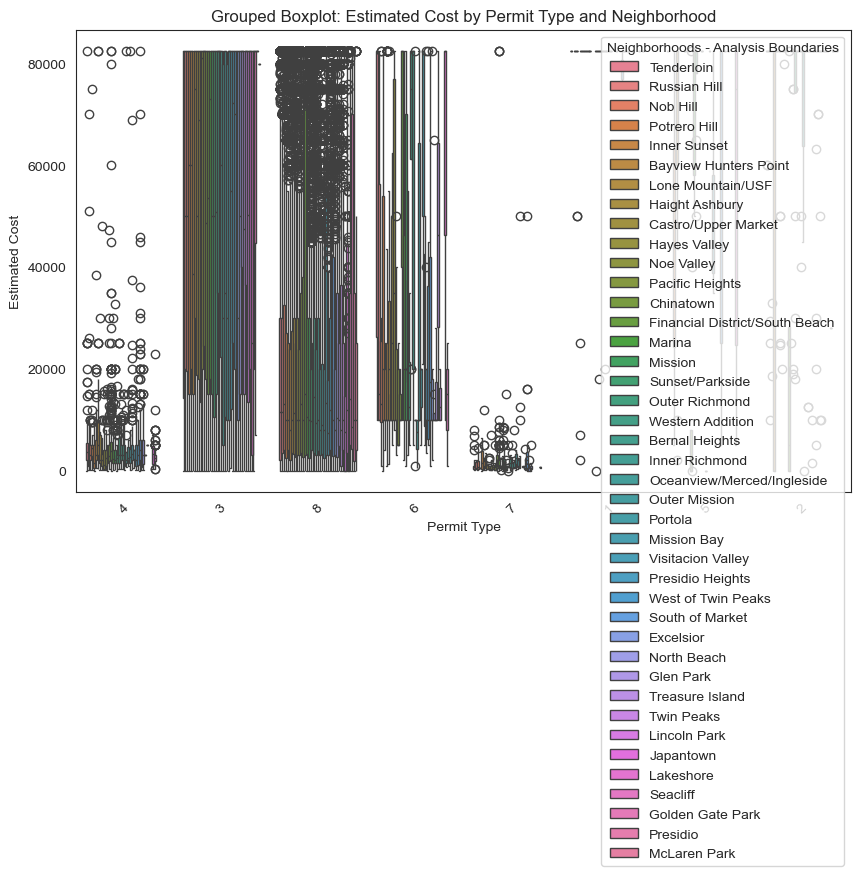

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Permit Type", y="Estimated Cost", hue="Neighborhoods - Analysis Boundaries", data=clean_data)
plt.xticks(rotation=45)
plt.title("Grouped Boxplot: Estimated Cost by Permit Type and Neighborhood")
plt.show()

## Grouped Bar_chart

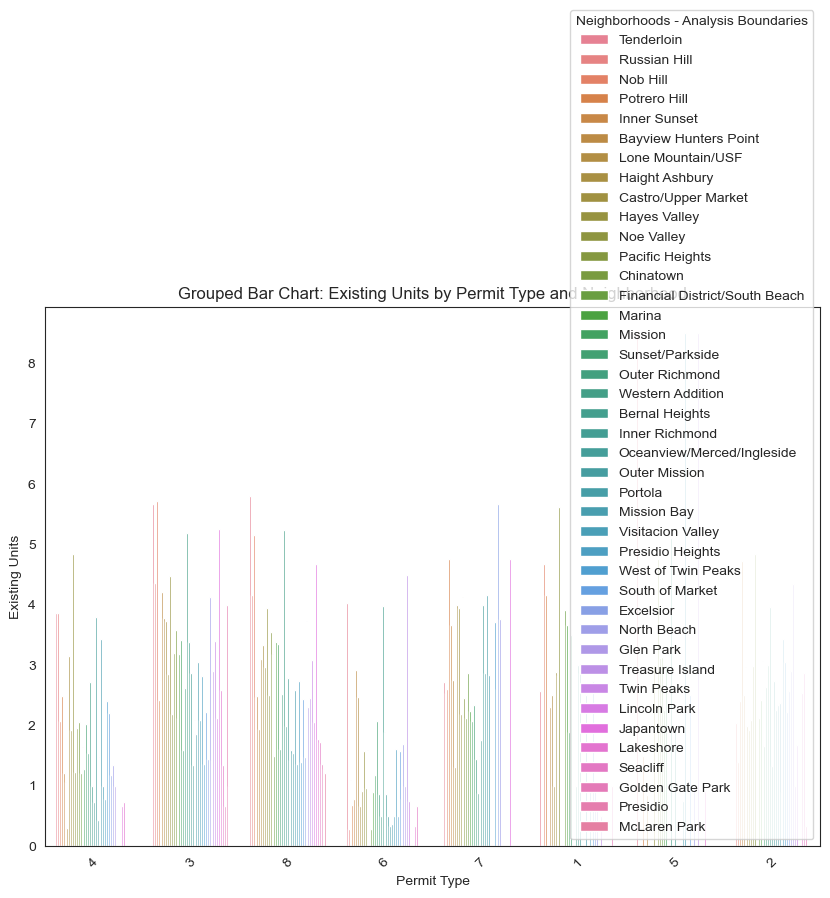

In [82]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Permit Type", y="Existing Units", hue="Neighborhoods - Analysis Boundaries", data=clean_data, errorbar=None)
plt.xticks(rotation=45)
plt.title("Grouped Bar Chart: Existing Units by Permit Type and Neighborhood")
plt.show()

### Stacked Percentage Heatmap

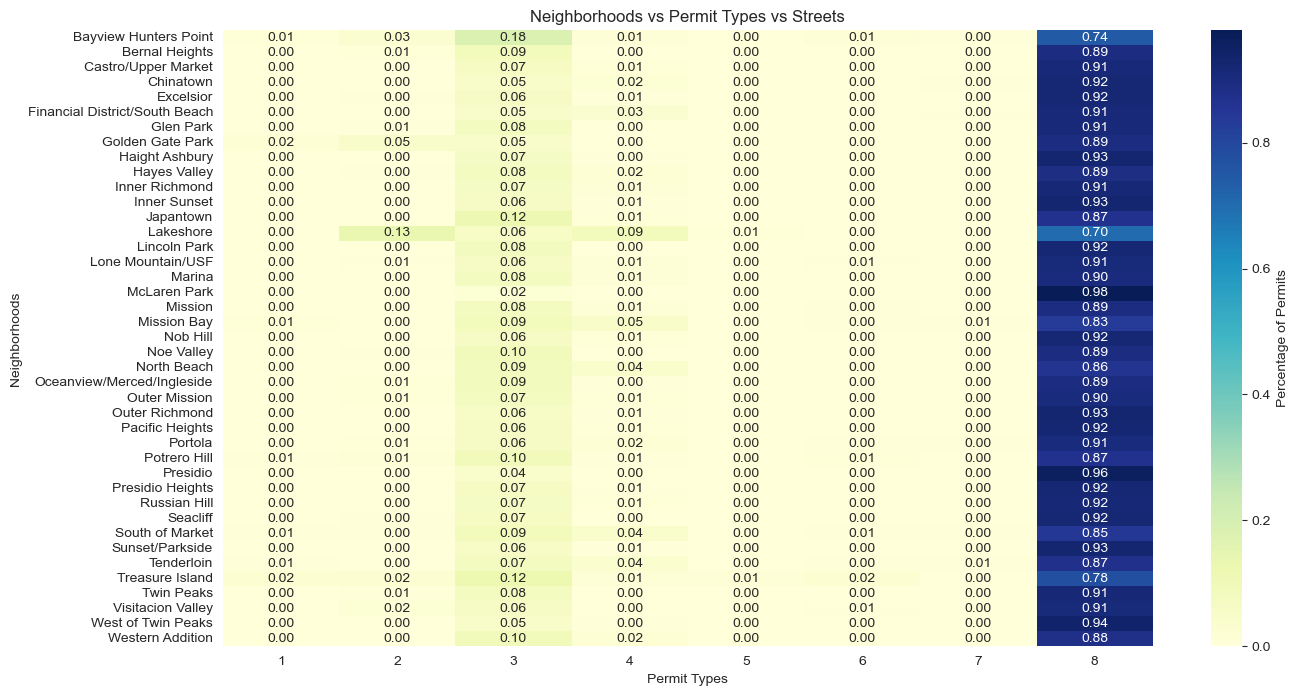

In [84]:
clean_data.columns = clean_data.columns.str.strip()

plt.figure(figsize=(15, 8))
heatmap_data = pd.crosstab(index=clean_data['Neighborhoods - Analysis Boundaries'], 
                           columns=clean_data['Permit Type'], 
                           values=clean_data['Street Name'].astype(str).apply(lambda x: 1),  # Count occurrences
                           aggfunc='count', 
                           normalize='index')

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Percentage of Permits'})
plt.title('Neighborhoods vs Permit Types vs Streets')
plt.xlabel('Permit Types')
plt.ylabel('Neighborhoods')
plt.show()

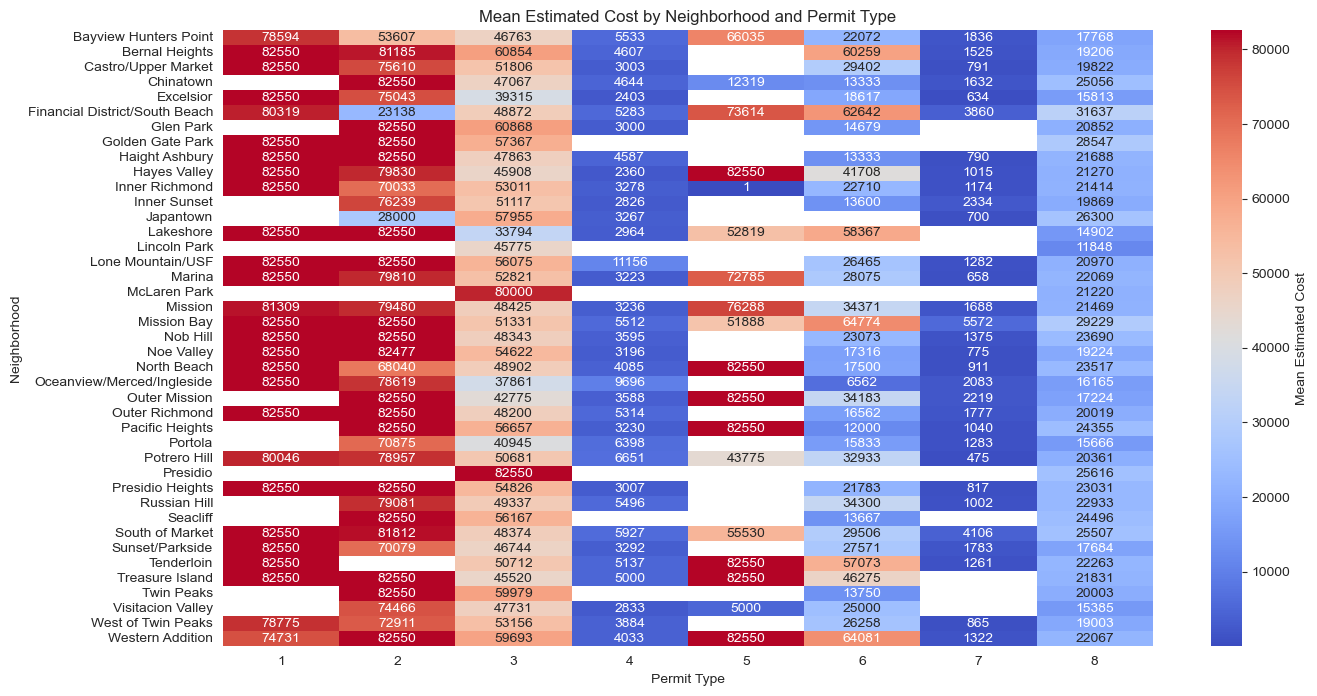

In [85]:
plt.figure(figsize=(15, 8))
heatmap_data = clean_data.pivot_table(index="Neighborhoods - Analysis Boundaries", 
                                      columns="Permit Type", 
                                      values="Estimated Cost",  
                                      aggfunc="mean")  

sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", cbar_kws={'label': 'Mean Estimated Cost'})
plt.title("Mean Estimated Cost by Neighborhood and Permit Type")
plt.xlabel("Permit Type")
plt.ylabel("Neighborhood")
plt.show()